# <div style="color:white;display:inline-block;border-radius:5px;background-color:#009688 ;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:85%;letter-spacing:0.5px;margin:0"><b> </b>Introduction</p></div>

In the realm of materials science, understanding hardness - the measure of a material's resistance to deformation - is paramount for applications ranging from ceramics to abrasives. This study employs advanced statistical and machine learning techniques to predict hardness in naturally occurring materials. By integrating atomic and electronic features, derived directly from composition, a comprehensive understanding of mineral compositions and crystal systems is achieved. The research, driven by the goal of accurate hardness prediction, begins by extracting elemental properties like van der Waals and covalent radii, as well as valence electron counts. This innovative approach holds potential for revolutionizing how we assess and design materials for a wide array of industrial applications.

# <div style="color:white;display:inline-block;border-radius:5px;background-color:#009688 ;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:85%;letter-spacing:0.5px;margin:0"><b> </b>Load necessary library</p></div>


In [1]:
options(warn = -1)
options(scipen = 10000)
options(repr.plot.width = 20, repr.plot.height = 13.5)

library(tidyverse)
library(scales)
library(RColorBrewer)
library(ggthemes)
library(lubridate)
library(viridis)
library(ggrepel)
library(reshape)
library(gridExtra)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal



Attaching package: ‘reshape’


The following object is masked from ‘package:lubridate’:

    stamp


The following object is masked from ‘package:dplyr’:

    re

# <div style="color:white;display:inline-block;border-radius:5px;background-color:#009688;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:85%;letter-spacing:0.5px;margin:0"><b> </b>Load Data</p></div>


In [2]:
data <- read.csv("/kaggle/input/prediction-of-mohs-hardness-with-machine-learning/jm79zfps6b-1/Artificial_Crystals_Dataset.csv")
mineral_data <- read.csv("/kaggle/input/prediction-of-mohs-hardness-with-machine-learning/jm79zfps6b-1/Mineral_Dataset_Supplementary_Info.csv")

# <div style="color:white;display:inline-block;border-radius:5px;background-color:#009688;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:85%;letter-spacing:0.5px;margin:0"><b> </b>Artificial Crystals</p></div>

In [3]:
head <- data[sample(1:nrow(data),5),]
head

,X,Formula,Crystal.structure,Hardness..Mohs.,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
31,30,BaCaBO3F,hexagonal,5.0,114.000,7.425576,16.28571,4.571429,36.45807,11.12857,2.604286,1.848571,1.0228571,0.4775786,1.060797
51,50,Pb2FeTaO6,cubic,6.0,311.000,47.231992,31.10000,4.800000,74.71871,11.19940,2.757000,1.742000,0.9560000,0.4660610,4.723199
40,39,InBO3,rhomohedral,6.0,78.000,9.683996,15.60000,4.800000,34.72422,10.98774,2.828000,1.682000,0.8360000,0.4778540,1.936799
5,4,Ga3PO7,trigonal,6.5,164.000,19.921324,14.90909,5.090909,32.01236,11.25557,2.881818,1.640909,0.8418182,0.4834800,1.811029
18,17,Nd0.02Sr2La0.667(VO4)2,hexagonal,5.0,225.219,21.553374,17.75195,4.522267,39.46166,10.85026,2.635493,1.808829,1.0350422,0.4770681,1.698855


In [4]:
# Assuming 'data' is the name of your dataset

# Get the number of rows and columns (shape)
shape <- dim(data)

# Get the column names
column_names <- colnames(data)

# Get summary information about the dataset
summary_info <- summary(data)

# Print the results
cat("Shape (Rows, Columns):\n", shape, "\n\n")
cat("Column Names:\n", column_names, "\n\n")
cat("Summary Information:\n")
print(summary_info)


Shape (Rows, Columns):
 52 15 

Column Names:
 X Formula Crystal.structure Hardness..Mohs. allelectrons_Total density_Total allelectrons_Average val_e_Average atomicweight_Average ionenergy_Average el_neg_chi_Average R_vdw_element_Average R_cov_element_Average zaratio_Average density_Average 

Summary Information:
       X           Formula          Crystal.structure  Hardness..Mohs.
 Min.   : 0.00   Length:52          Length:52          Min.   :2.500  
 1st Qu.:12.75   Class :character   Class :character   1st Qu.:4.500  
 Median :25.50   Mode  :character   Mode  :character   Median :5.500  
 Mean   :25.50                                         Mean   :5.448  
 3rd Qu.:38.25                                         3rd Qu.:6.500  
 Max.   :51.00                                         Max.   :9.000  
 allelectrons_Total density_Total    allelectrons_Average val_e_Average  
 Min.   :   0.0     Min.   :  0.00   Min.   : 0.00        Min.   :0.000  
 1st Qu.: 100.5     1st Qu.:  9.54   1s

In [5]:
# Check for null values
null_values <- sum(is.na(data))

# Check for duplicates
duplicate_rows <- sum(duplicated(data))

# Print the results
cat("Null Values:", null_values, "\n")
cat("Duplicate Rows:", duplicate_rows, "\n")


Null Values: 0 
Duplicate Rows: 0 


# <div style="color:white;display:inline-block;border-radius:5px;background-color:#009688;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:85%;letter-spacing:0.5px;margin:0"><b> </b>Exploratory Data Analysis (EDA)</p></div>

### We'll generate some summary statistics and visualizations to understand the data.

In [6]:
# Summary statistics
summary(data)

       X           Formula          Crystal.structure  Hardness..Mohs.
 Min.   : 0.00   Length:52          Length:52          Min.   :2.500  
 1st Qu.:12.75   Class :character   Class :character   1st Qu.:4.500  
 Median :25.50   Mode  :character   Mode  :character   Median :5.500  
 Mean   :25.50                                         Mean   :5.448  
 3rd Qu.:38.25                                         3rd Qu.:6.500  
 Max.   :51.00                                         Max.   :9.000  
 allelectrons_Total density_Total    allelectrons_Average val_e_Average  
 Min.   :   0.0     Min.   :  0.00   Min.   : 0.00        Min.   :0.000  
 1st Qu.: 100.5     1st Qu.:  9.54   1st Qu.:10.46        1st Qu.:4.360  
 Median : 192.6     Median : 21.89   Median :13.77        Median :4.571  
 Mean   : 241.1     Mean   : 26.75   Mean   :15.25        Mean   :4.380  
 3rd Qu.: 256.3     3rd Qu.: 27.98   3rd Qu.:17.67        3rd Qu.:4.800  
 Max.   :2024.2     Max.   :236.46   Max.   :48.17        M

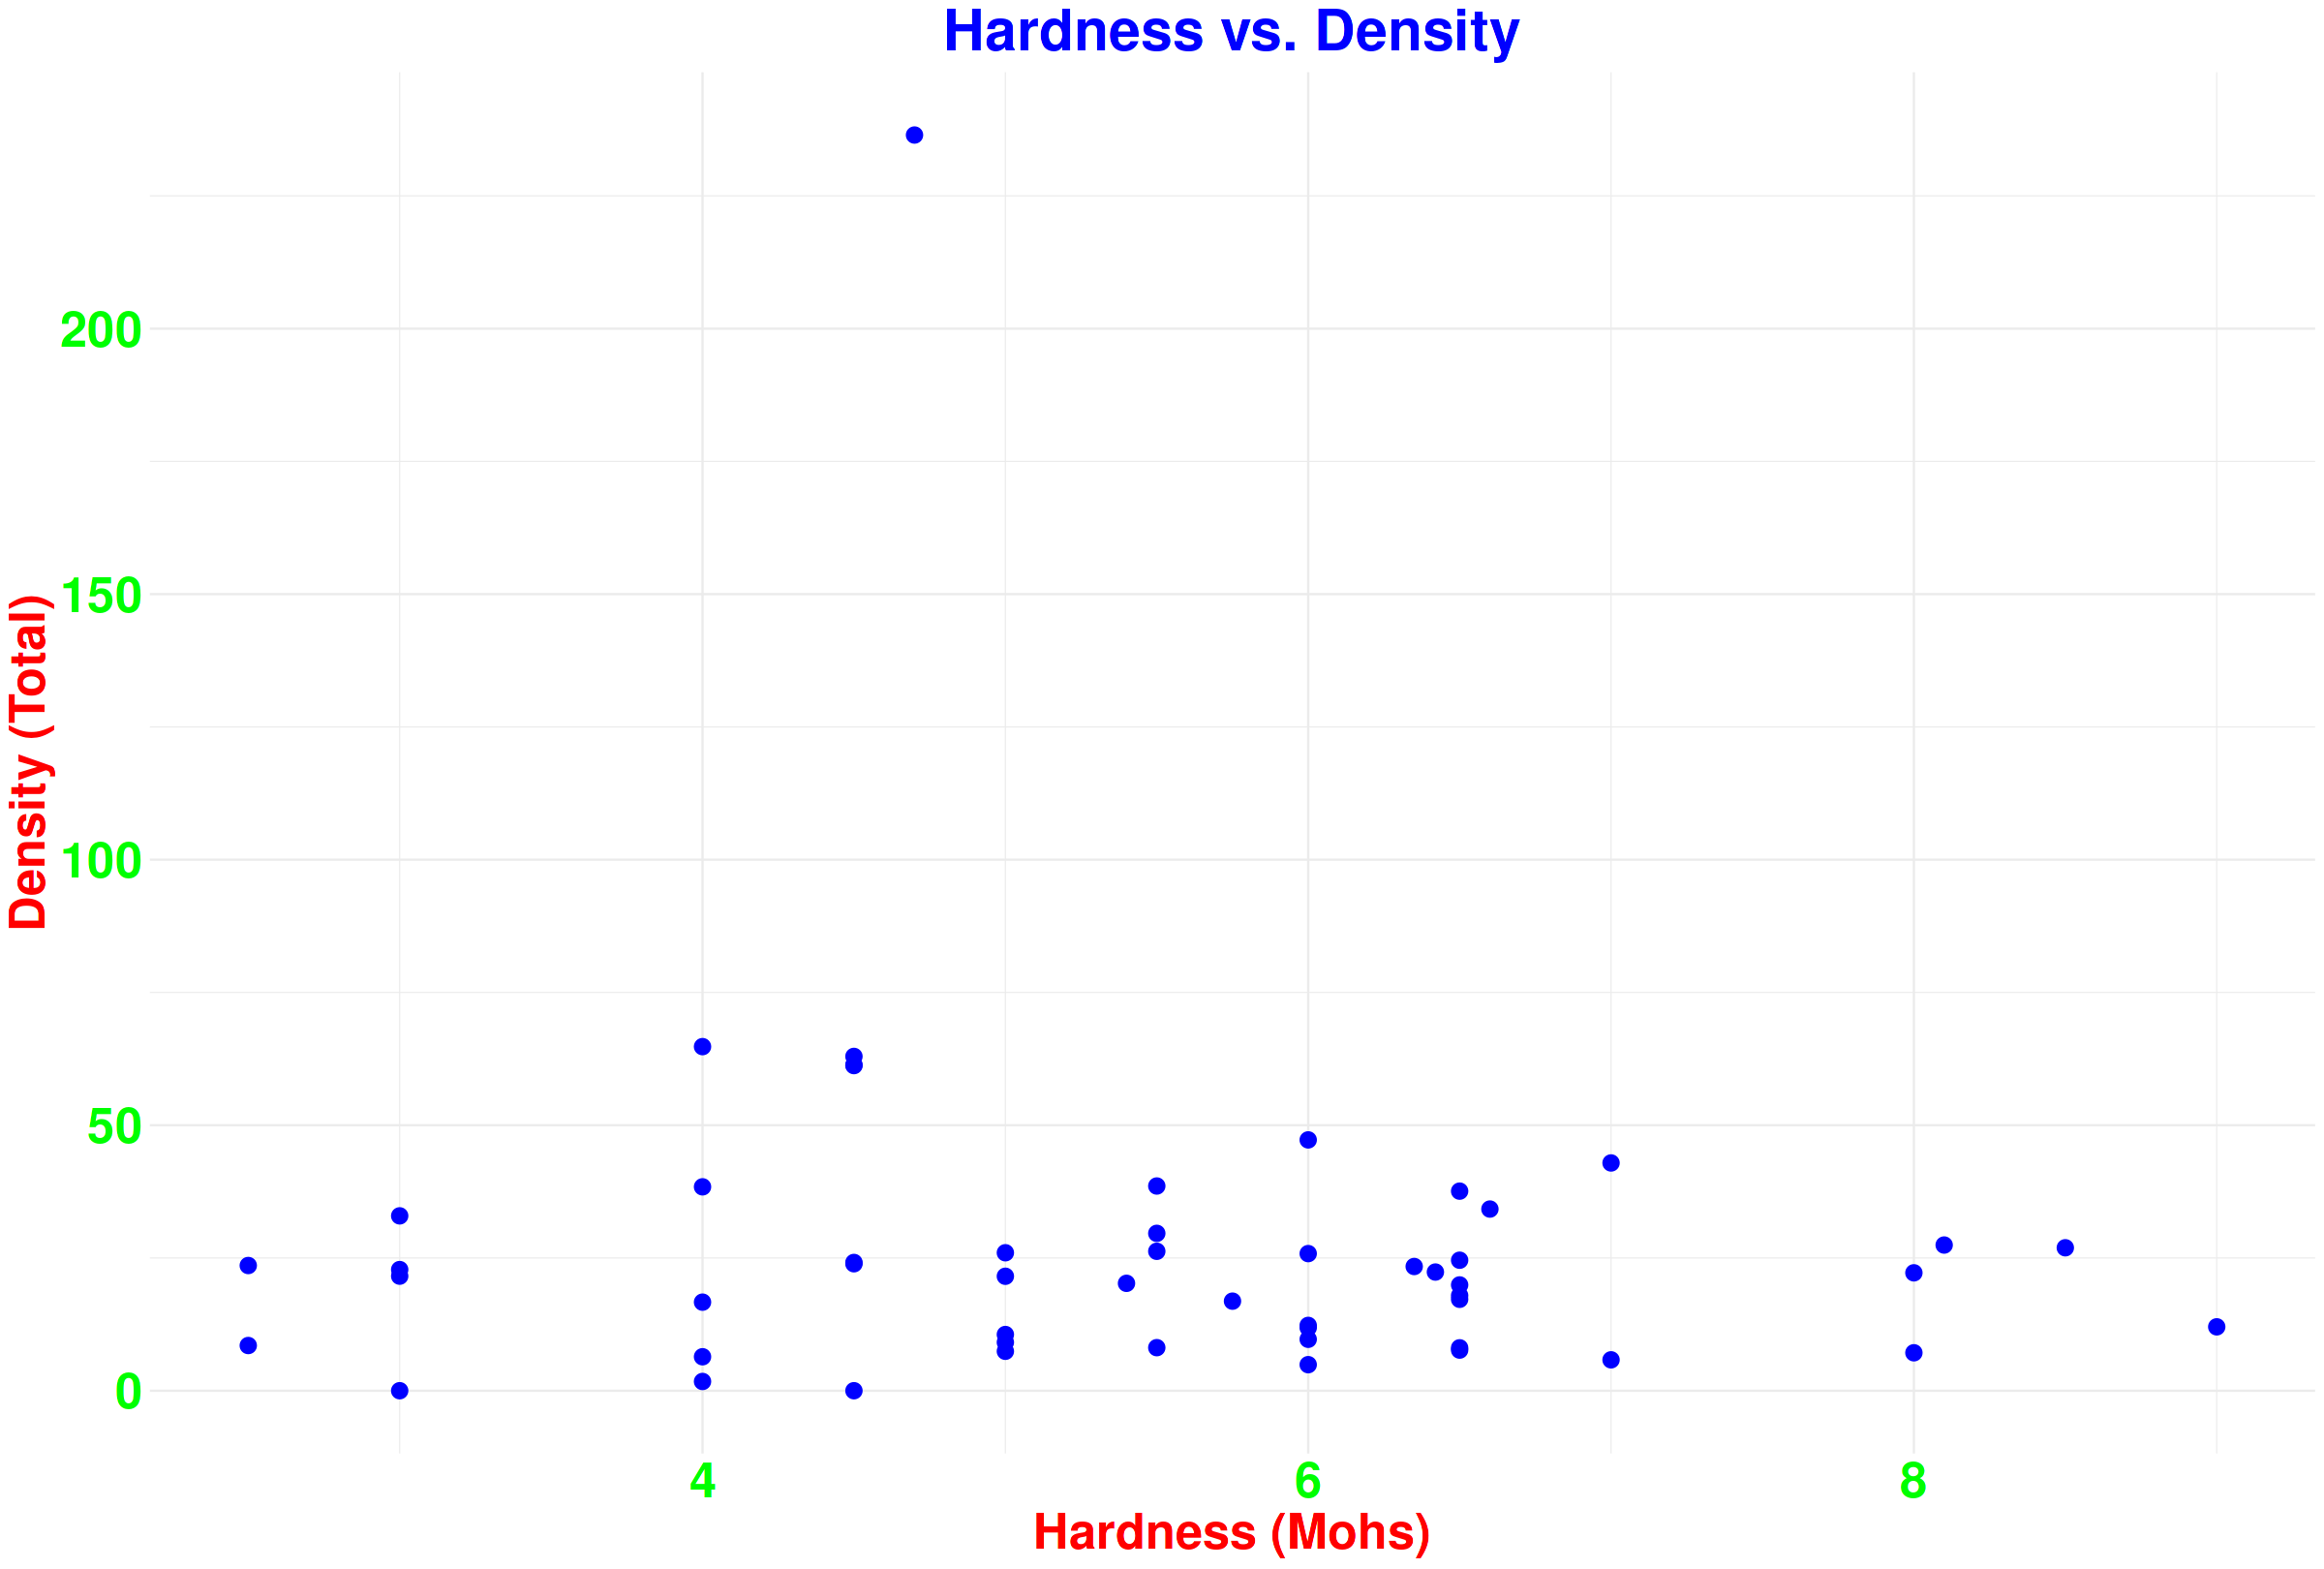

Mean Hardness: 5.448462 
Mean Density: 26.74789 


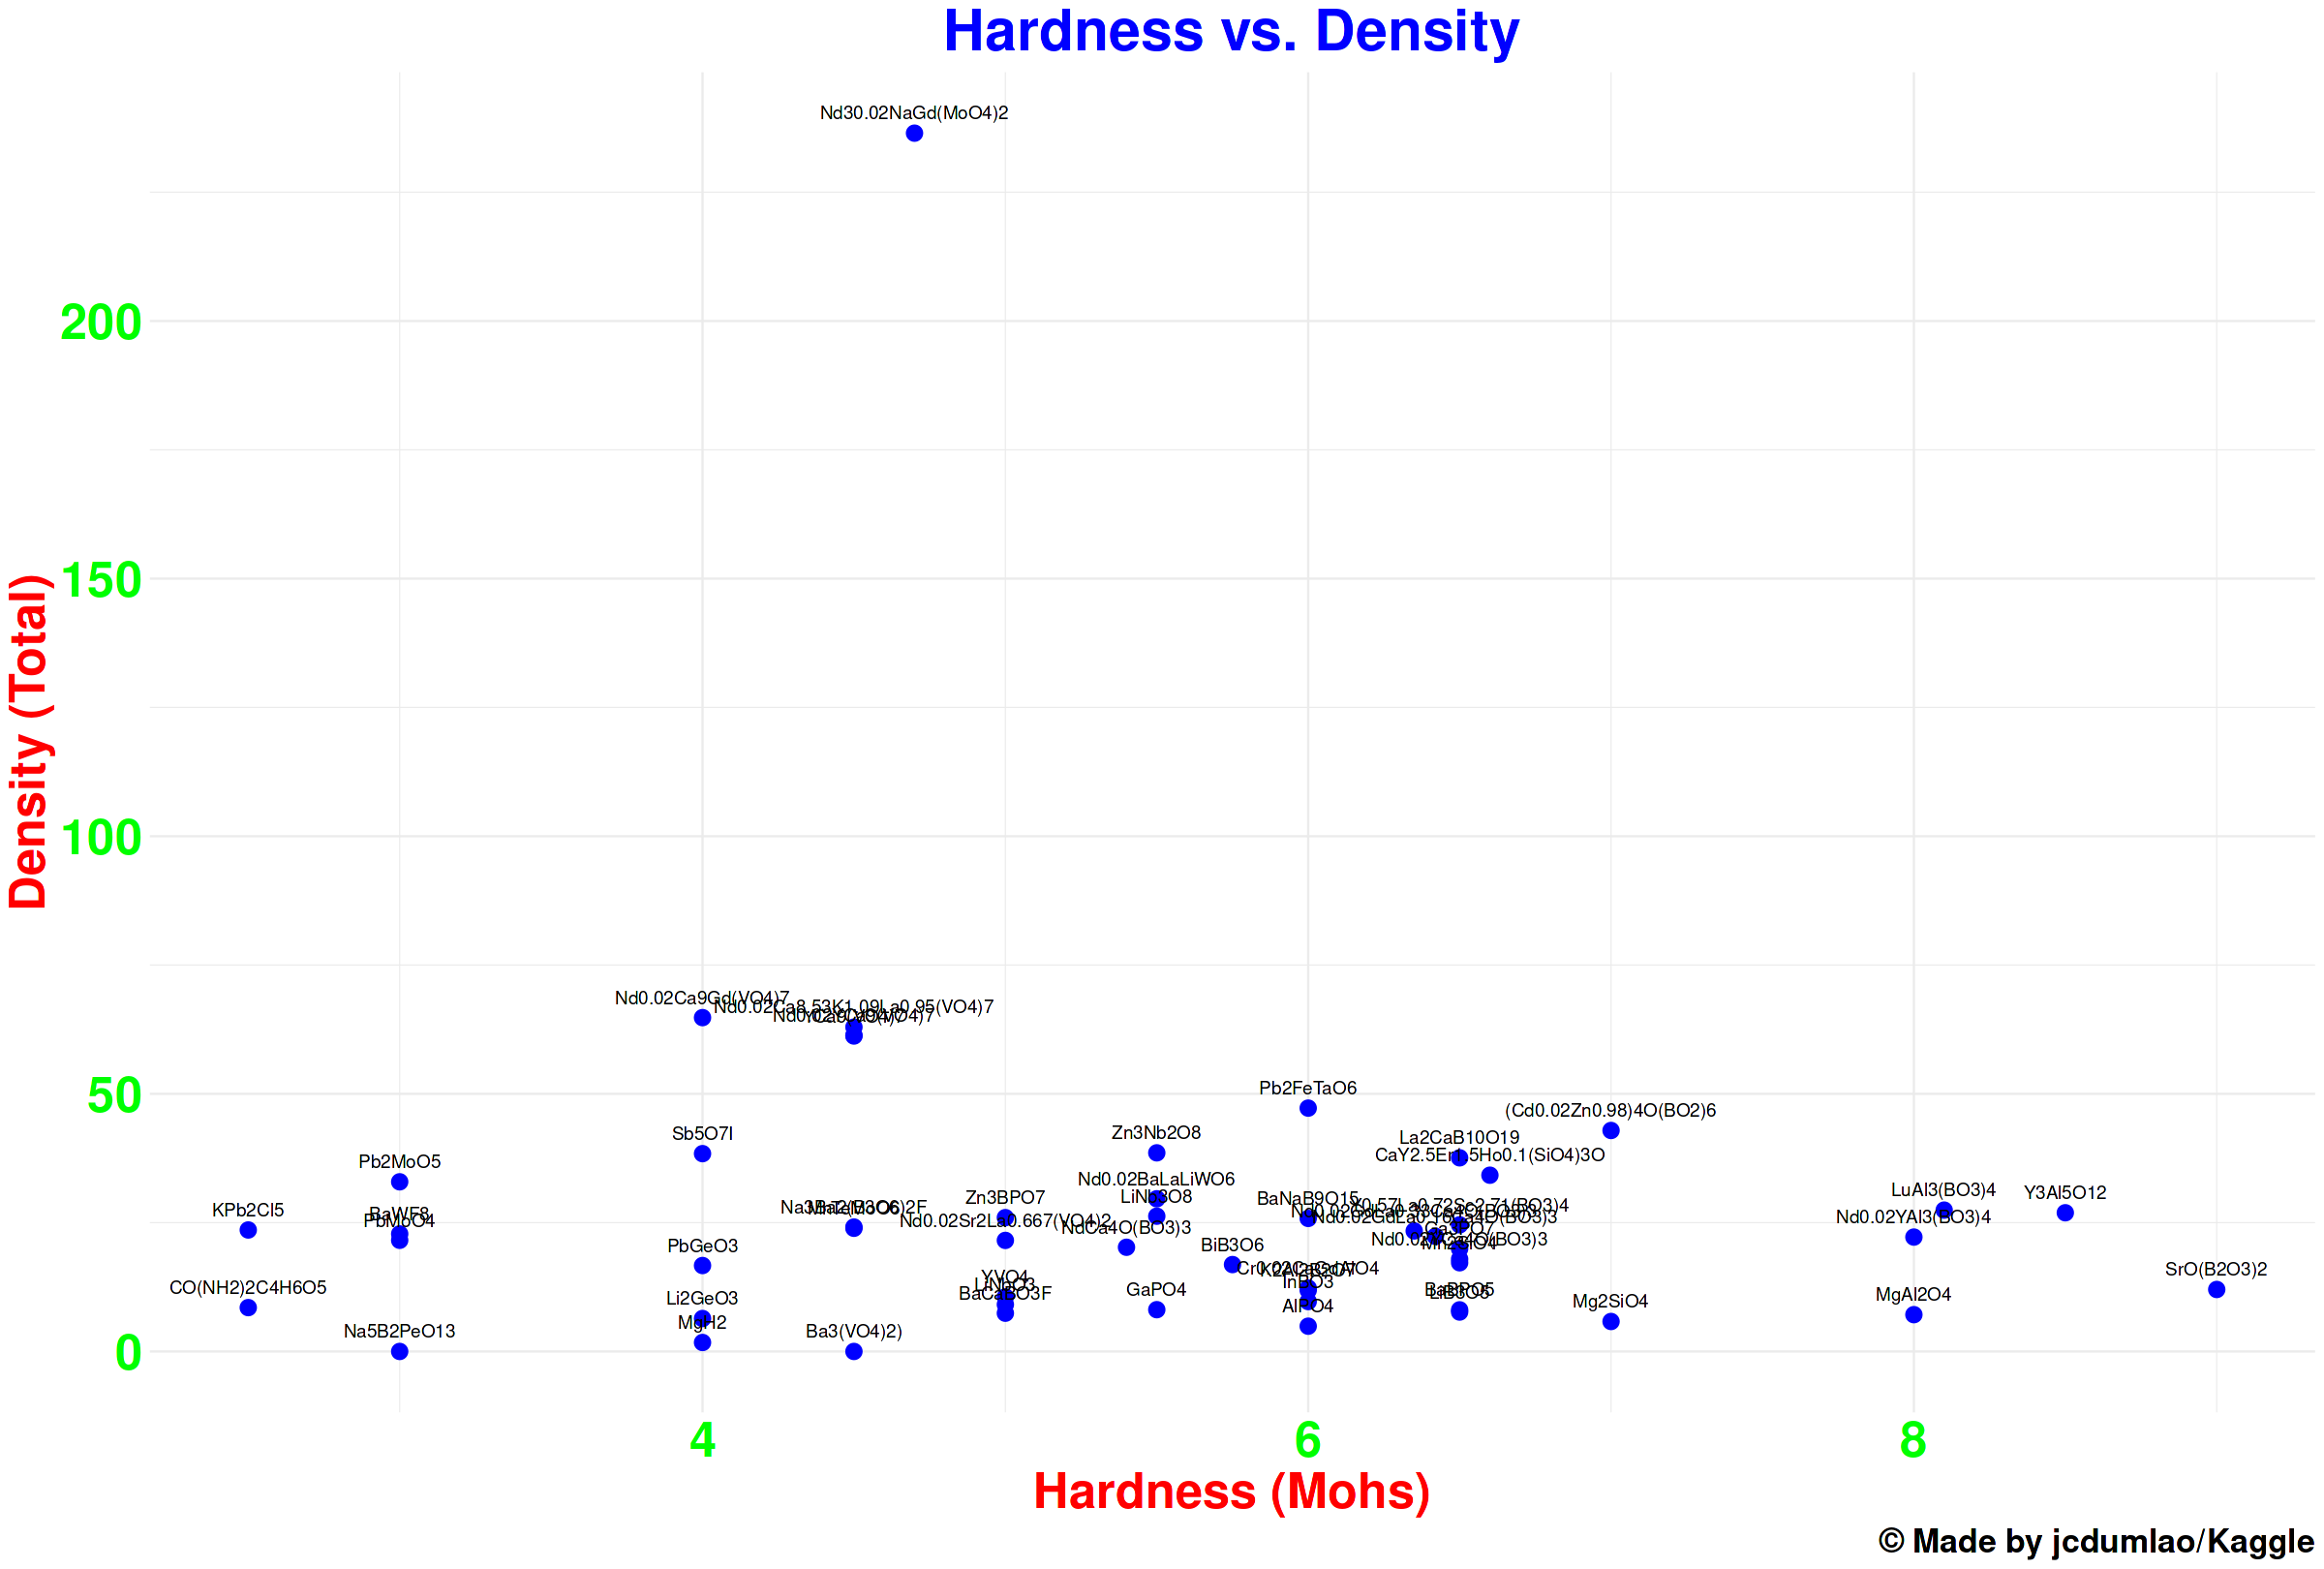

In [7]:
# Scatter plot
ggplot(data, aes(x = Hardness..Mohs., y = density_Total)) +
  geom_point(color = "blue", size = 4) +
  theme_minimal() +
  labs(title = "Hardness vs. Density",
       x = "Hardness (Mohs)",
       y = "Density (Total)") +
  theme(plot.title = element_text(size = 35, color = "blue", face = "bold", hjust = 0.5),
        axis.title = element_text(size = 30, color = "red", face = "bold"),
        axis.text = element_text(size = 30, color = "green", face = "bold"),
        legend.position = "none")
  
  # Add labels
ggplot(data, aes(x = Hardness..Mohs., y = density_Total)) +
  geom_point(color = "blue", size = 4) +
  geom_text(aes(label = Formula), vjust = -1) +
  theme_minimal() +
  labs(title = "Hardness vs. Density",
       caption = "© Made by jcdumlao/Kaggle",
       x = "Hardness (Mohs)",
       y = "Density (Total)") +
  theme(plot.title = element_text(size = 35,color = "blue", face = "bold", hjust = 0.5),
        plot.caption = element_text(size = 20,face = "bold"),
        axis.title = element_text(size = 30, color = "red", face = "bold"),
        axis.text = element_text(size = 30, color = "green", face = "bold"),
        legend.position = "none")

cat("Mean Hardness:", mean(data$Hardness..Mohs.), "\n")
cat("Mean Density:", mean(data$density_Total), "\n")

# Save the plot
ggsave("Hardness vs. Density.png", plot = last_plot(), width = 18, height = 6)



🟪 Based on the plot and results, you can craft a story around the relationship between Hardness and Density. For example, "The scatter plot shows a positive correlation between Hardness (Mohs) and Total Density. The mean Hardness is X and the mean Density is Y. 

Mean Hardness: 5.448462 
Median Hardness: 5.5 
Standard Deviation Hardness: 1.523433 


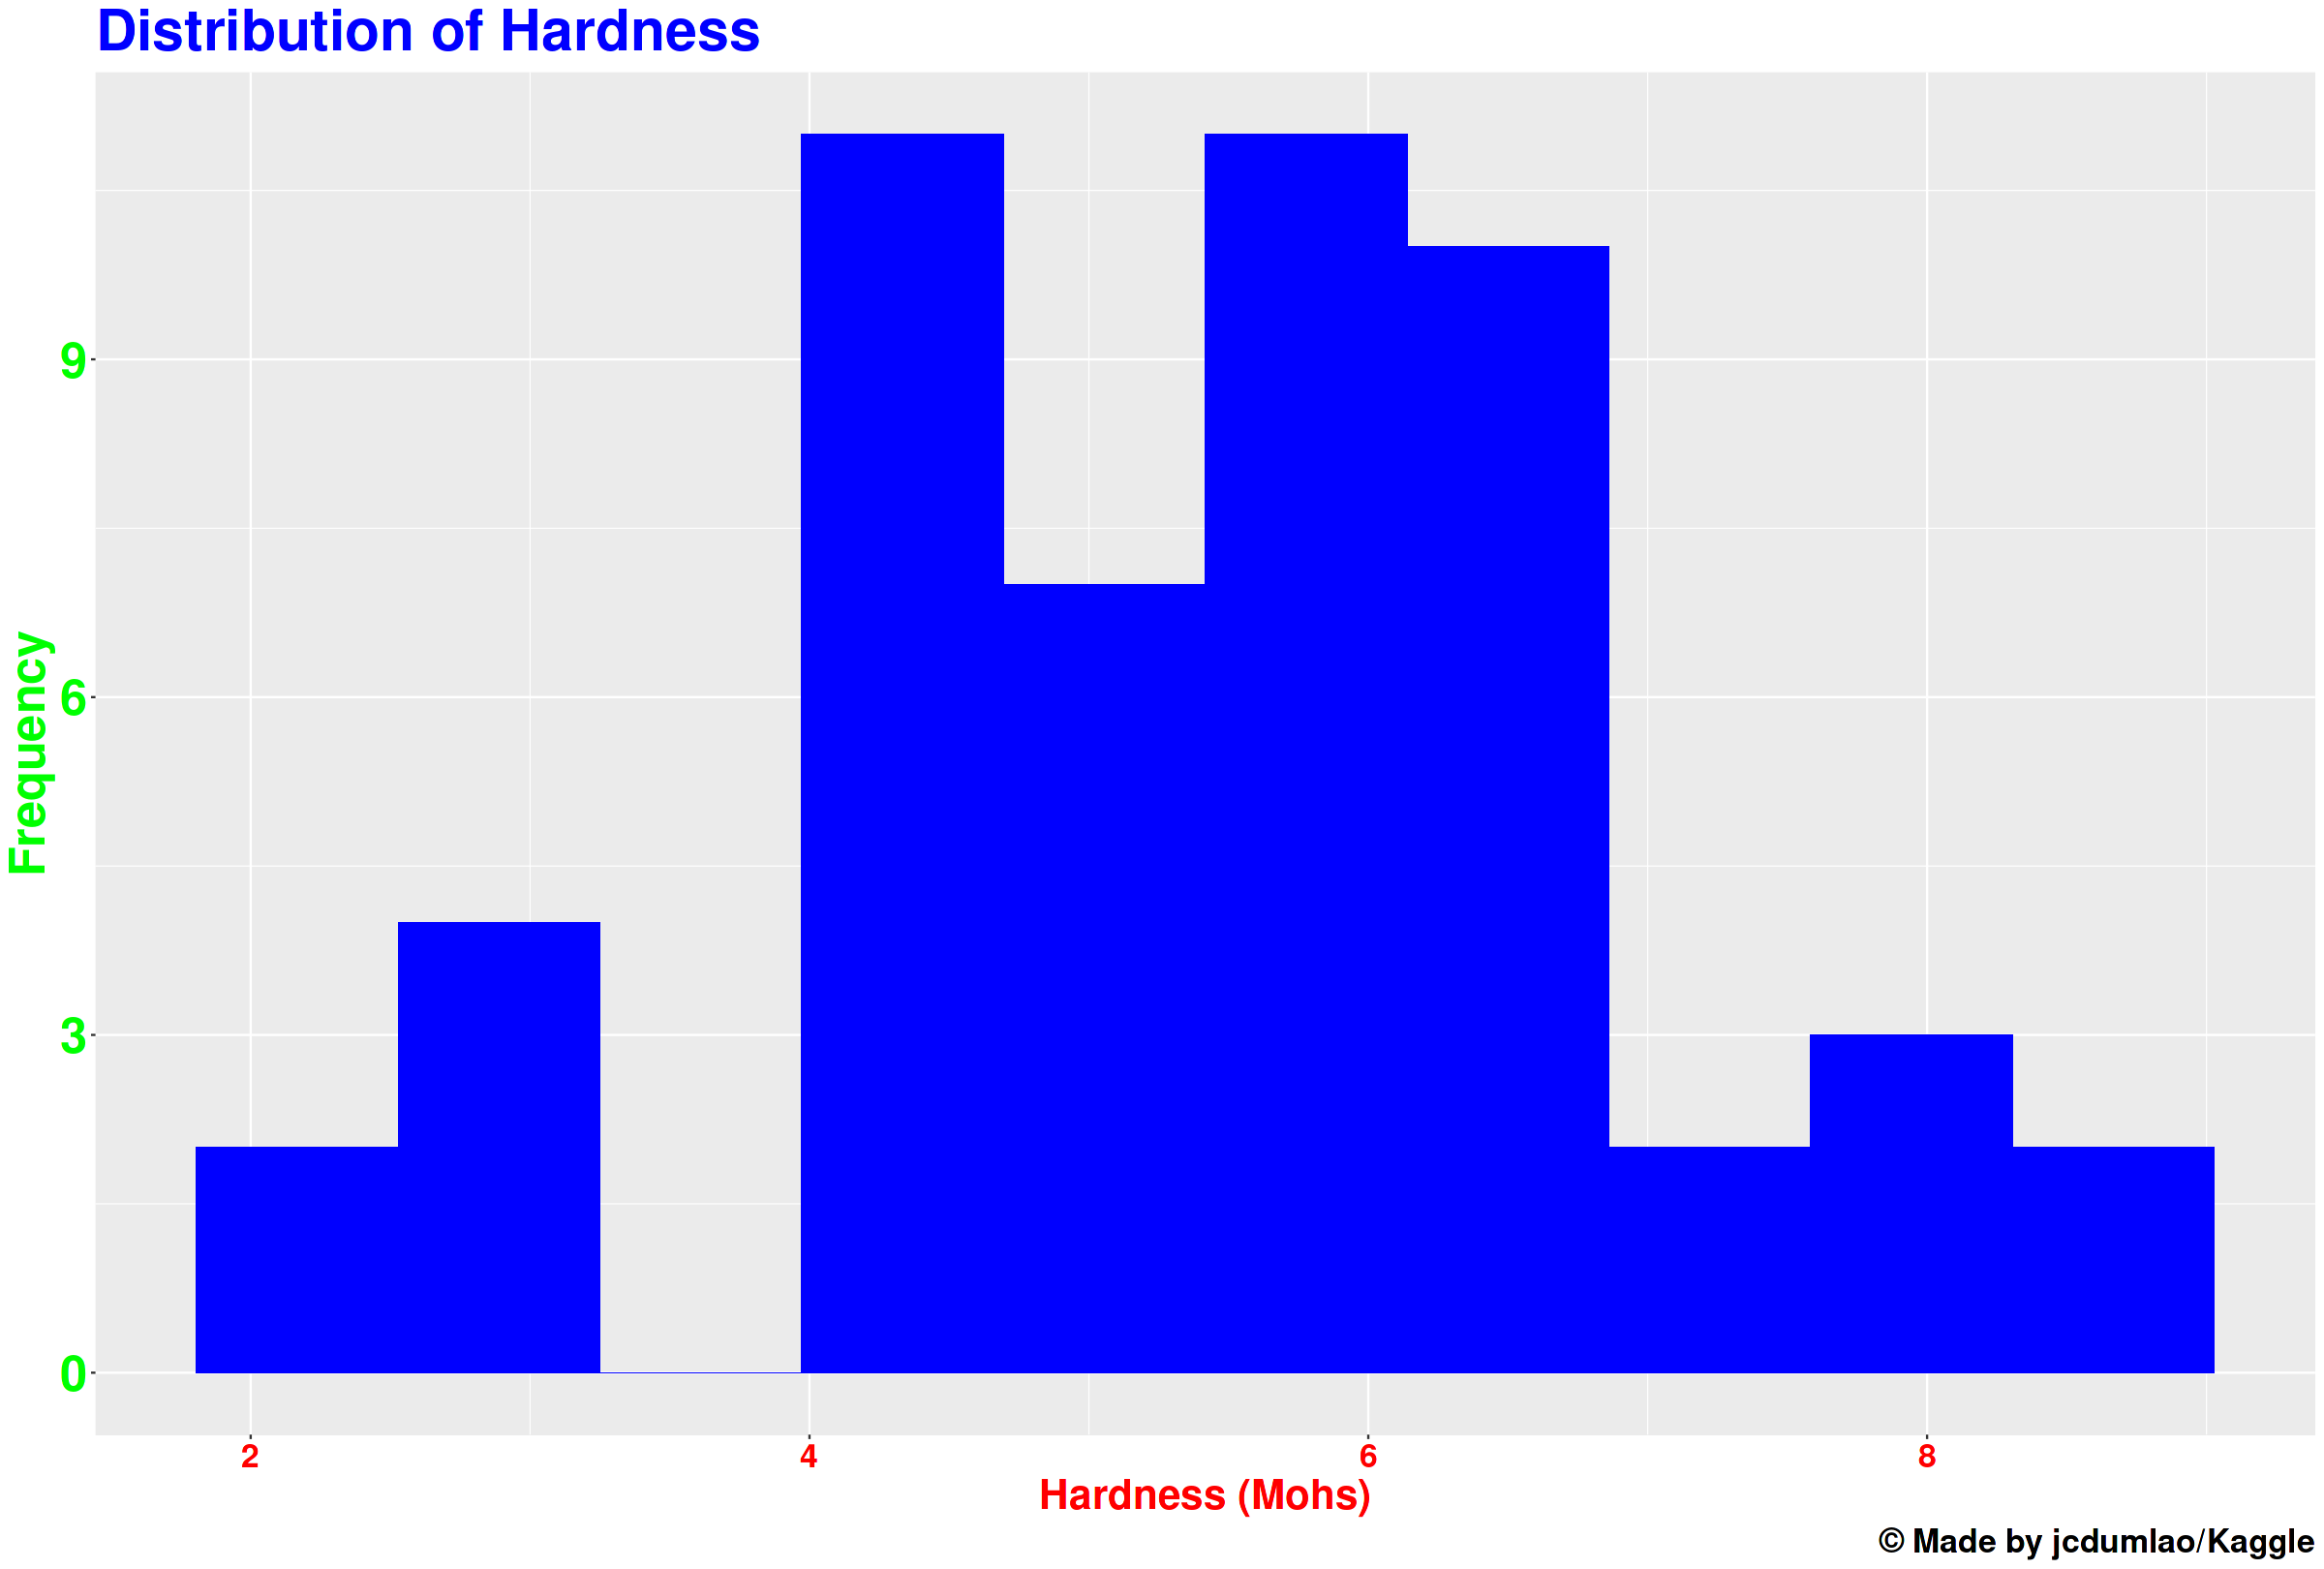

In [8]:
# Histogram for Hardness
ggplot(data, aes(x = Hardness..Mohs.)) +
  geom_histogram(fill = "blue", bins = 10) +
  labs(title = "Distribution of Hardness",
       caption = "© Made by jcdumlao/Kaggle",
       x = "Hardness (Mohs)",
       y = "Frequency") +
  theme(
    plot.title = element_text(size = 35, color = "blue", face = "bold"),
    plot.caption = element_text(size = 20,face = "bold"),
    axis.title.x = element_text(size = 25, color = "red", face = "bold"),
    axis.title.y = element_text(size = 30, color = "green", face = "bold"),
    axis.text.x = element_text(size = 20, color = "red", face = "bold"),
    axis.text.y = element_text(size = 30, color = "green", face = "bold")
  )

# Print result values
cat("Mean Hardness:", mean(data$Hardness..Mohs.), "\n")
cat("Median Hardness:", median(data$Hardness..Mohs.), "\n")
cat("Standard Deviation Hardness:", sd(data$Hardness..Mohs.), "\n")

# Save the plot
ggsave("Distribution of Hardness.png", plot = last_plot(), width = 18, height = 6)


🟪  Hardness Distribution:

* The histogram displays the distribution of hardness values measured in Mohs. The majority of the materials have hardness values clustered around 5 Mohs. The mean hardness is approximately 5.44 Mohs, with a standard deviation of about 1.52. This indicates that most of the materials in the dataset have similar hardness levels.

Mean Density: 26.74789 
Median Density: 21.88766 
Standard Deviation Density: 33.71028 


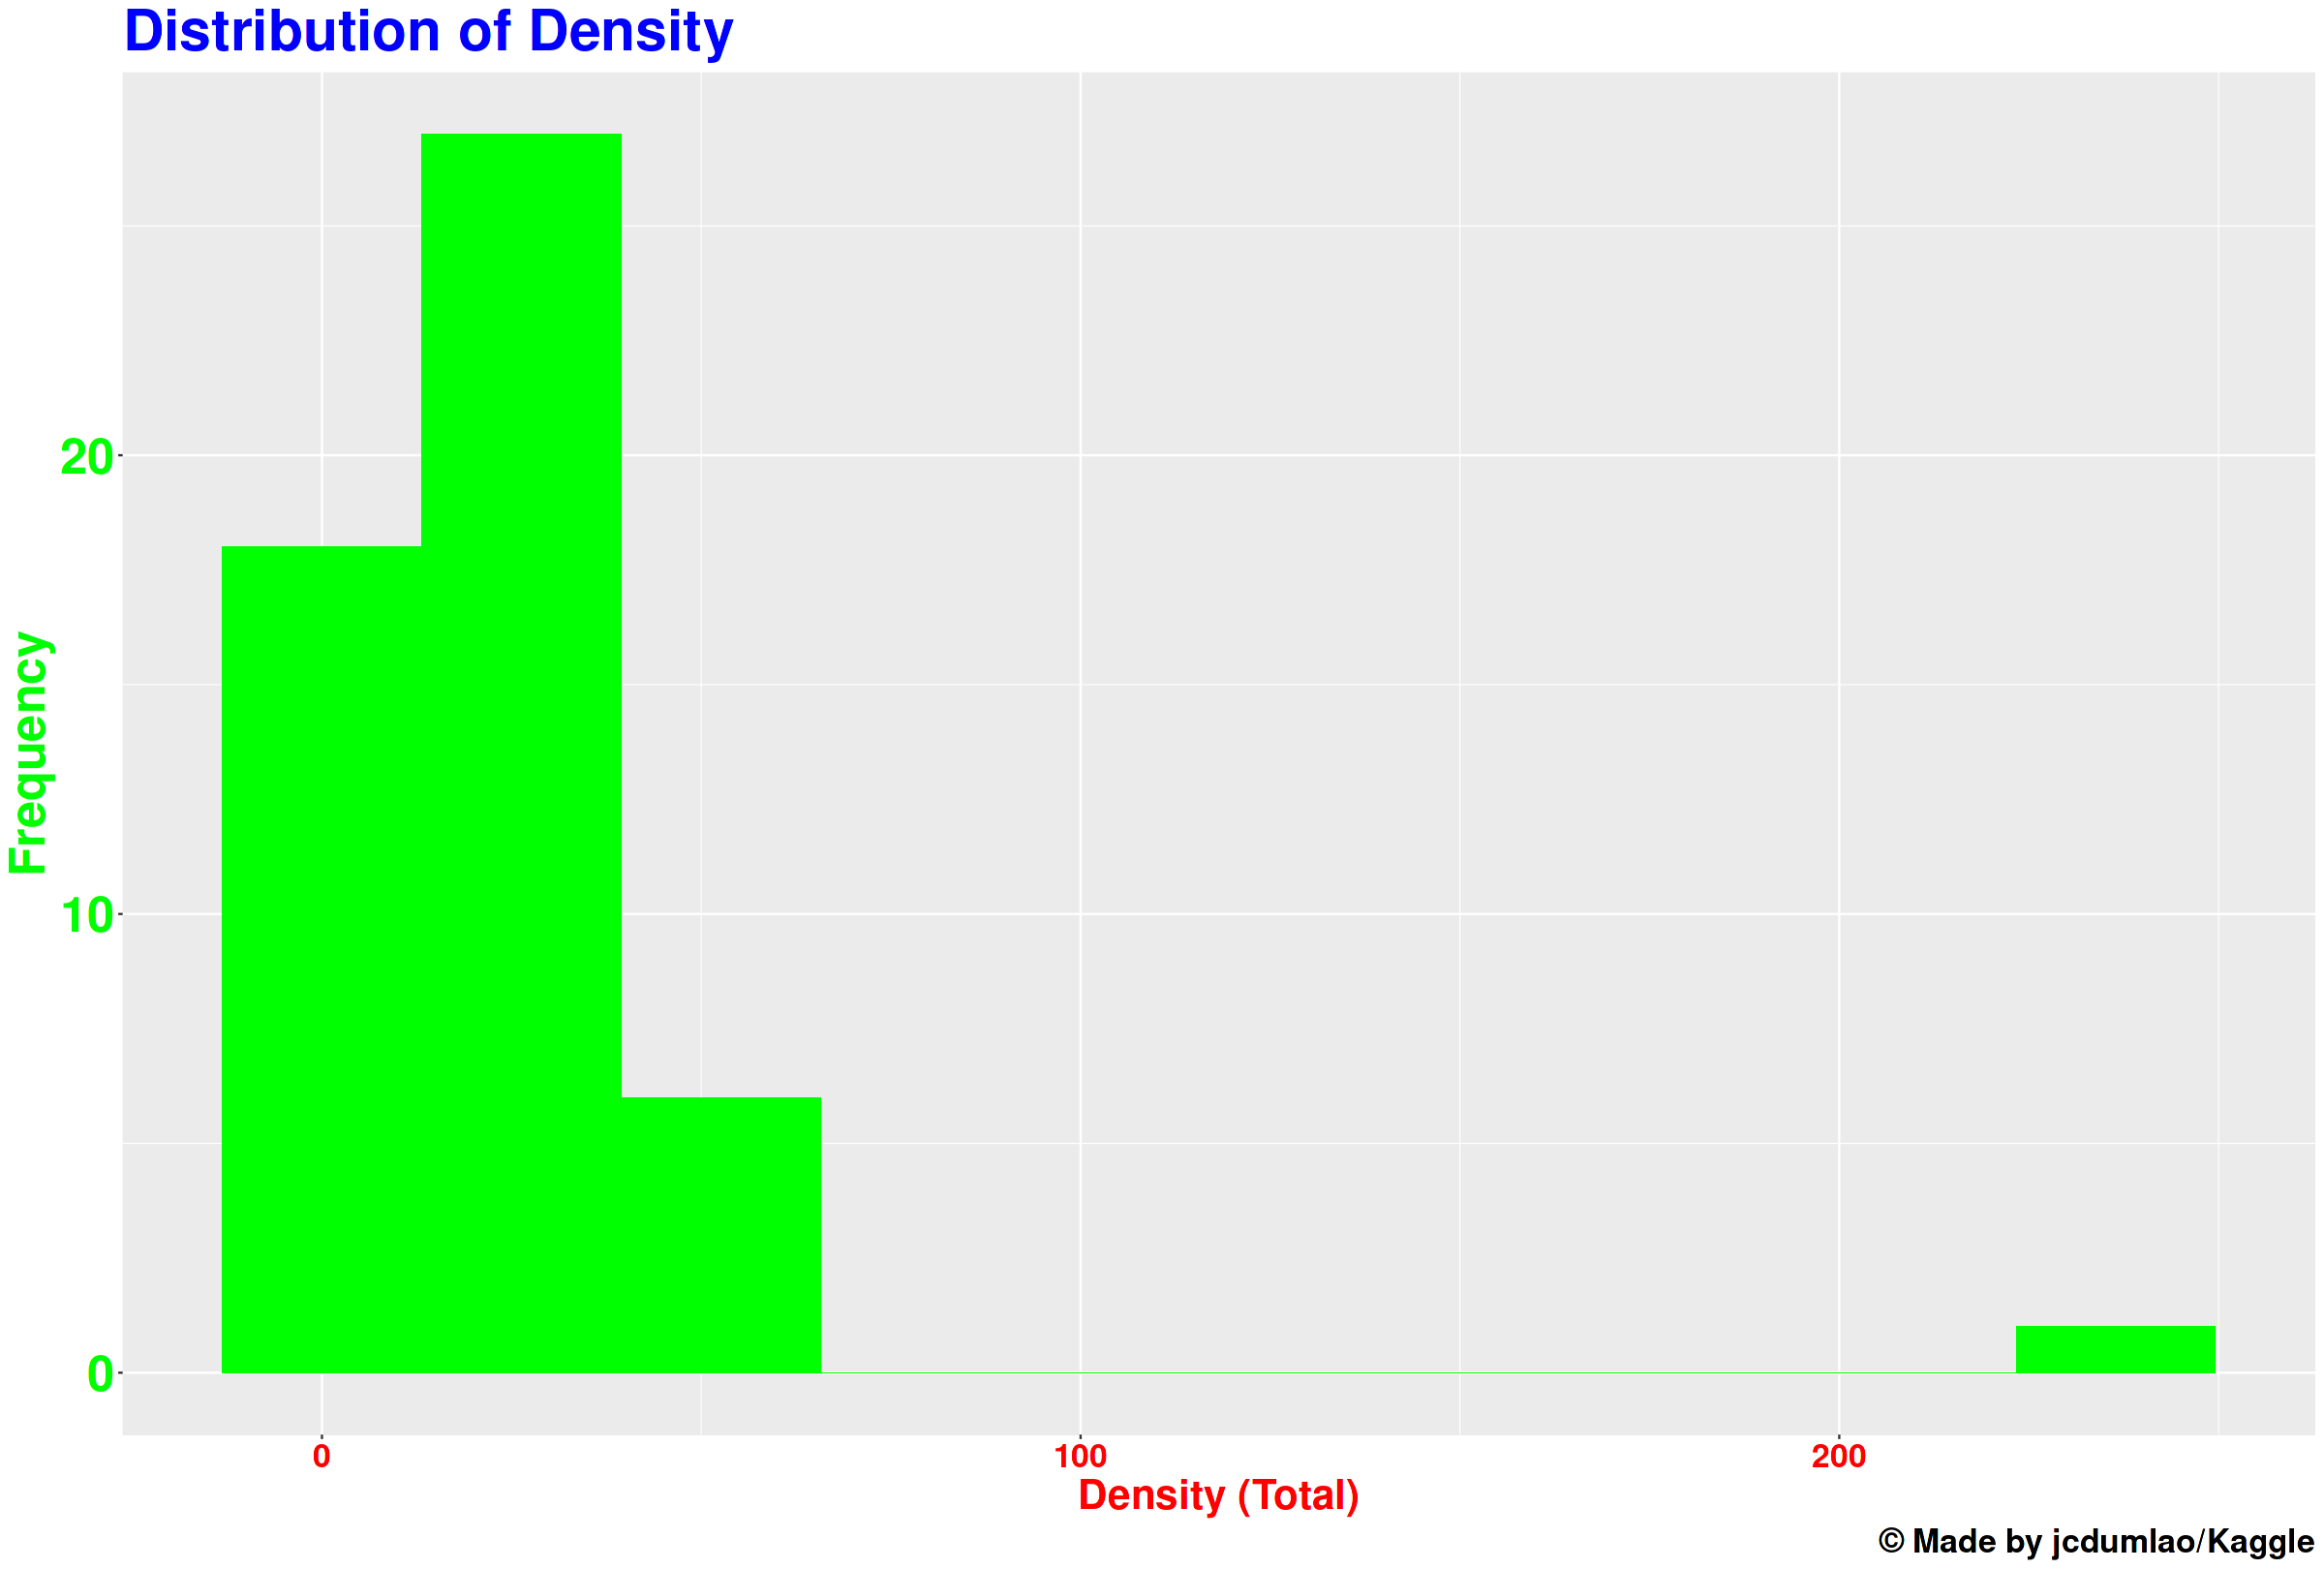

In [9]:
# Histogram for Density
ggplot(data, aes(x = density_Total)) +
  geom_histogram(fill = "green", bins = 10) +
  labs(title = "Distribution of Density",
       caption = "© Made by jcdumlao/Kaggle",
       x = "Density (Total)",
       y = "Frequency") +
  theme(
    plot.title = element_text(size = 35, color = "blue", face = "bold"),
    plot.caption = element_text(size = 20,face = "bold"),
    axis.title.x = element_text(size = 25, color = "red", face = "bold"),
    axis.title.y = element_text(size = 30, color = "green", face = "bold"),
    axis.text.x = element_text(size = 20, color = "red", face = "bold"),
    axis.text.y = element_text(size = 30, color = "green", face = "bold")
  )

# Print result values
cat("Mean Density:", mean(data$density_Total), "\n")
cat("Median Density:", median(data$density_Total), "\n")
cat("Standard Deviation Density:", sd(data$density_Total), "\n")

# Save the plot
ggsave("Distribution of Density.png", plot = last_plot(), width = 18, height = 6)


🟪 Density Distribution:

* This histogram illustrates the distribution of total densities. The data is slightly right-skewed, indicating that there are a few materials with higher densities. The mean density is roughly 26.74, with a standard deviation of approximately 33.71. This suggests that the dataset contains a range of density values, with some materials being significantly denser than others.

Crystal.structure,Hardness..Mohs.
<chr>,<dbl>
,3.000000
cubic,7.000000
hexagonal,4.942857
monoclinic,5.028000
orthorhombic,6.666667
rhomohedral,5.166667
tetragonal,4.671429
trigonal,6.011111


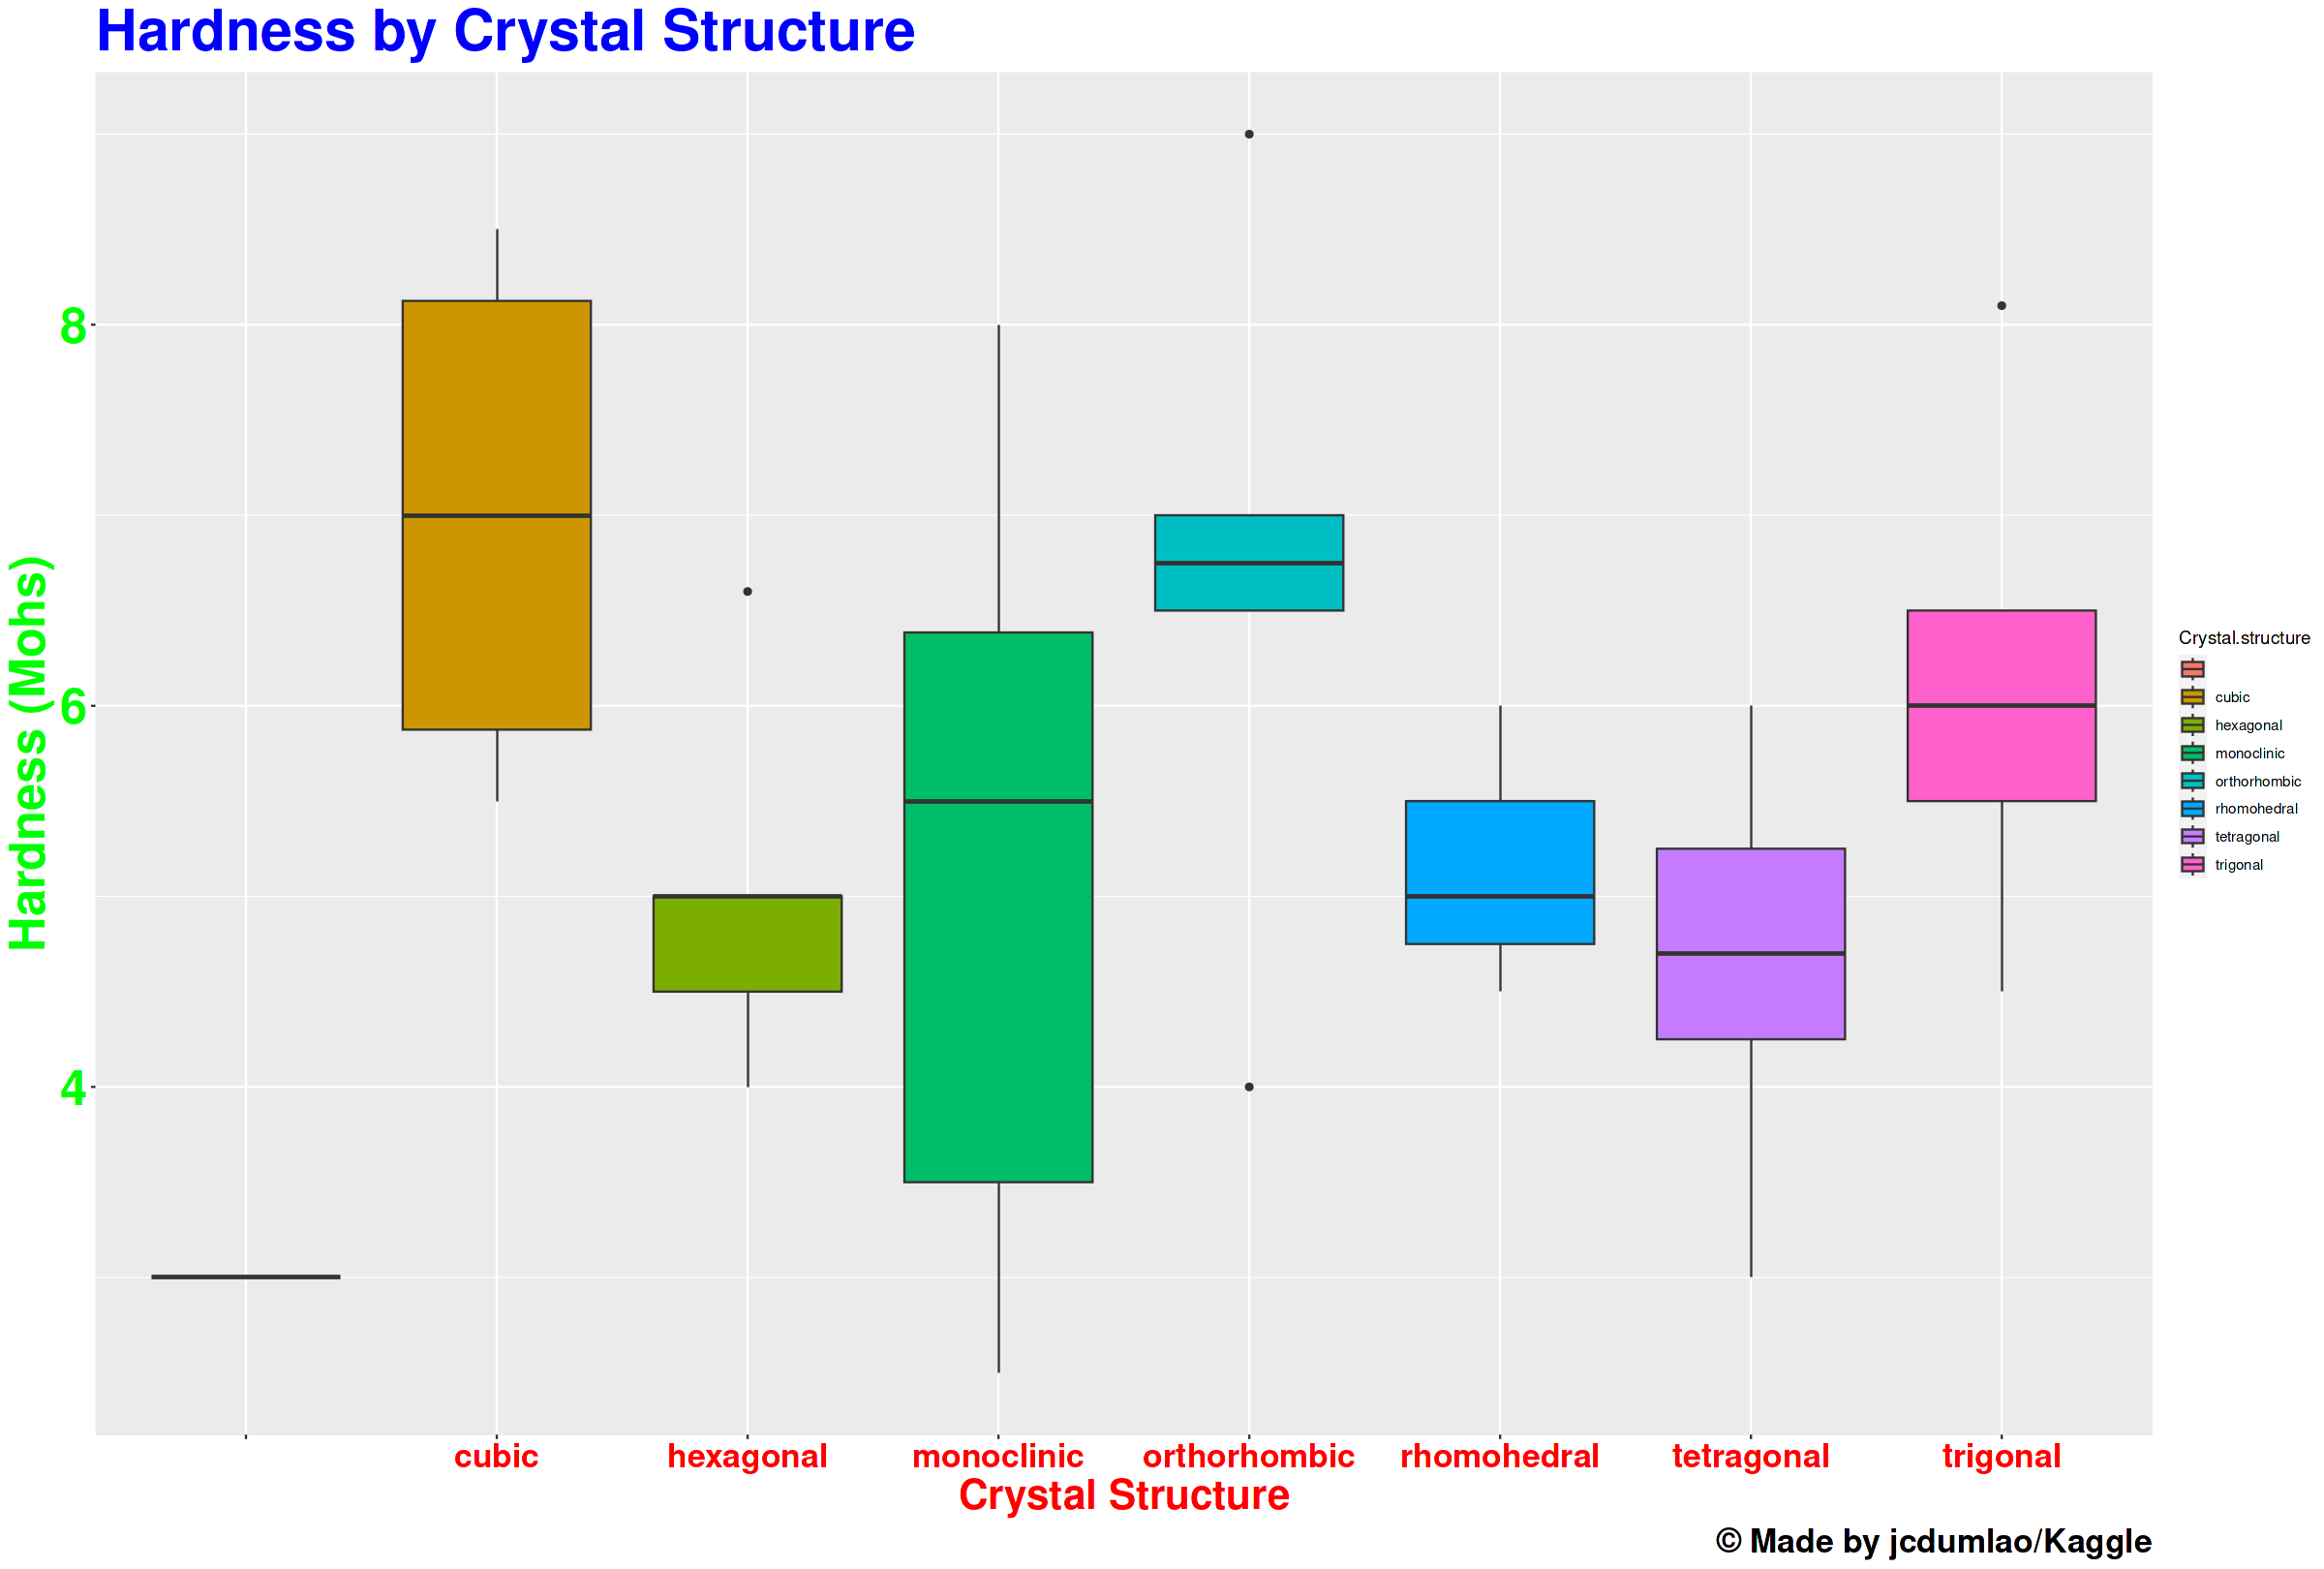

In [10]:
# Boxplot for Hardness by Crystal Structure
ggplot(data, aes(x = Crystal.structure, y = Hardness..Mohs., fill = Crystal.structure)) +
  geom_boxplot() +
  labs(title = "Hardness by Crystal Structure",
       caption = "© Made by jcdumlao/Kaggle",
       x = "Crystal Structure",
       y = "Hardness (Mohs)") +
  theme(
    plot.title = element_text(size = 35, color = "blue", face = "bold"),
    plot.caption = element_text(size = 20,face = "bold"),
    axis.title.x = element_text(size = 25, color = "red", face = "bold"),
    axis.title.y = element_text(size = 30, color = "green", face = "bold"),
    axis.text.x = element_text(size = 20, color = "red", face = "bold"),
    axis.text.y = element_text(size = 30, color = "green", face = "bold")
  )

# Print result values (e.g., means for each Crystal Structure)
aggregate(Hardness..Mohs. ~ Crystal.structure, data = data, mean)

# Save the plot
ggsave("boxplot_hardness_by_crystal_structure.png", plot = last_plot(), width = 18, height = 6)


🟪 Hardness by Crystal Structure:

* The boxplots show the distribution of hardness values across different crystal structures. We observe variations in hardness among different crystal structures. For instance, materials with a cubic crystal structure tend to have higher hardness values, while materials with a monoclinic structure have a wider range of hardness levels. The boxplots provide insight into how crystal structure may influence the hardness of materials.


                   Hardness..Mohs. density_Total allelectrons_Total
Hardness..Mohs.         1.00000000   -0.09936229         -0.1092782
density_Total          -0.09936229    1.00000000          0.9879471
allelectrons_Total     -0.10927824    0.98794708          1.0000000


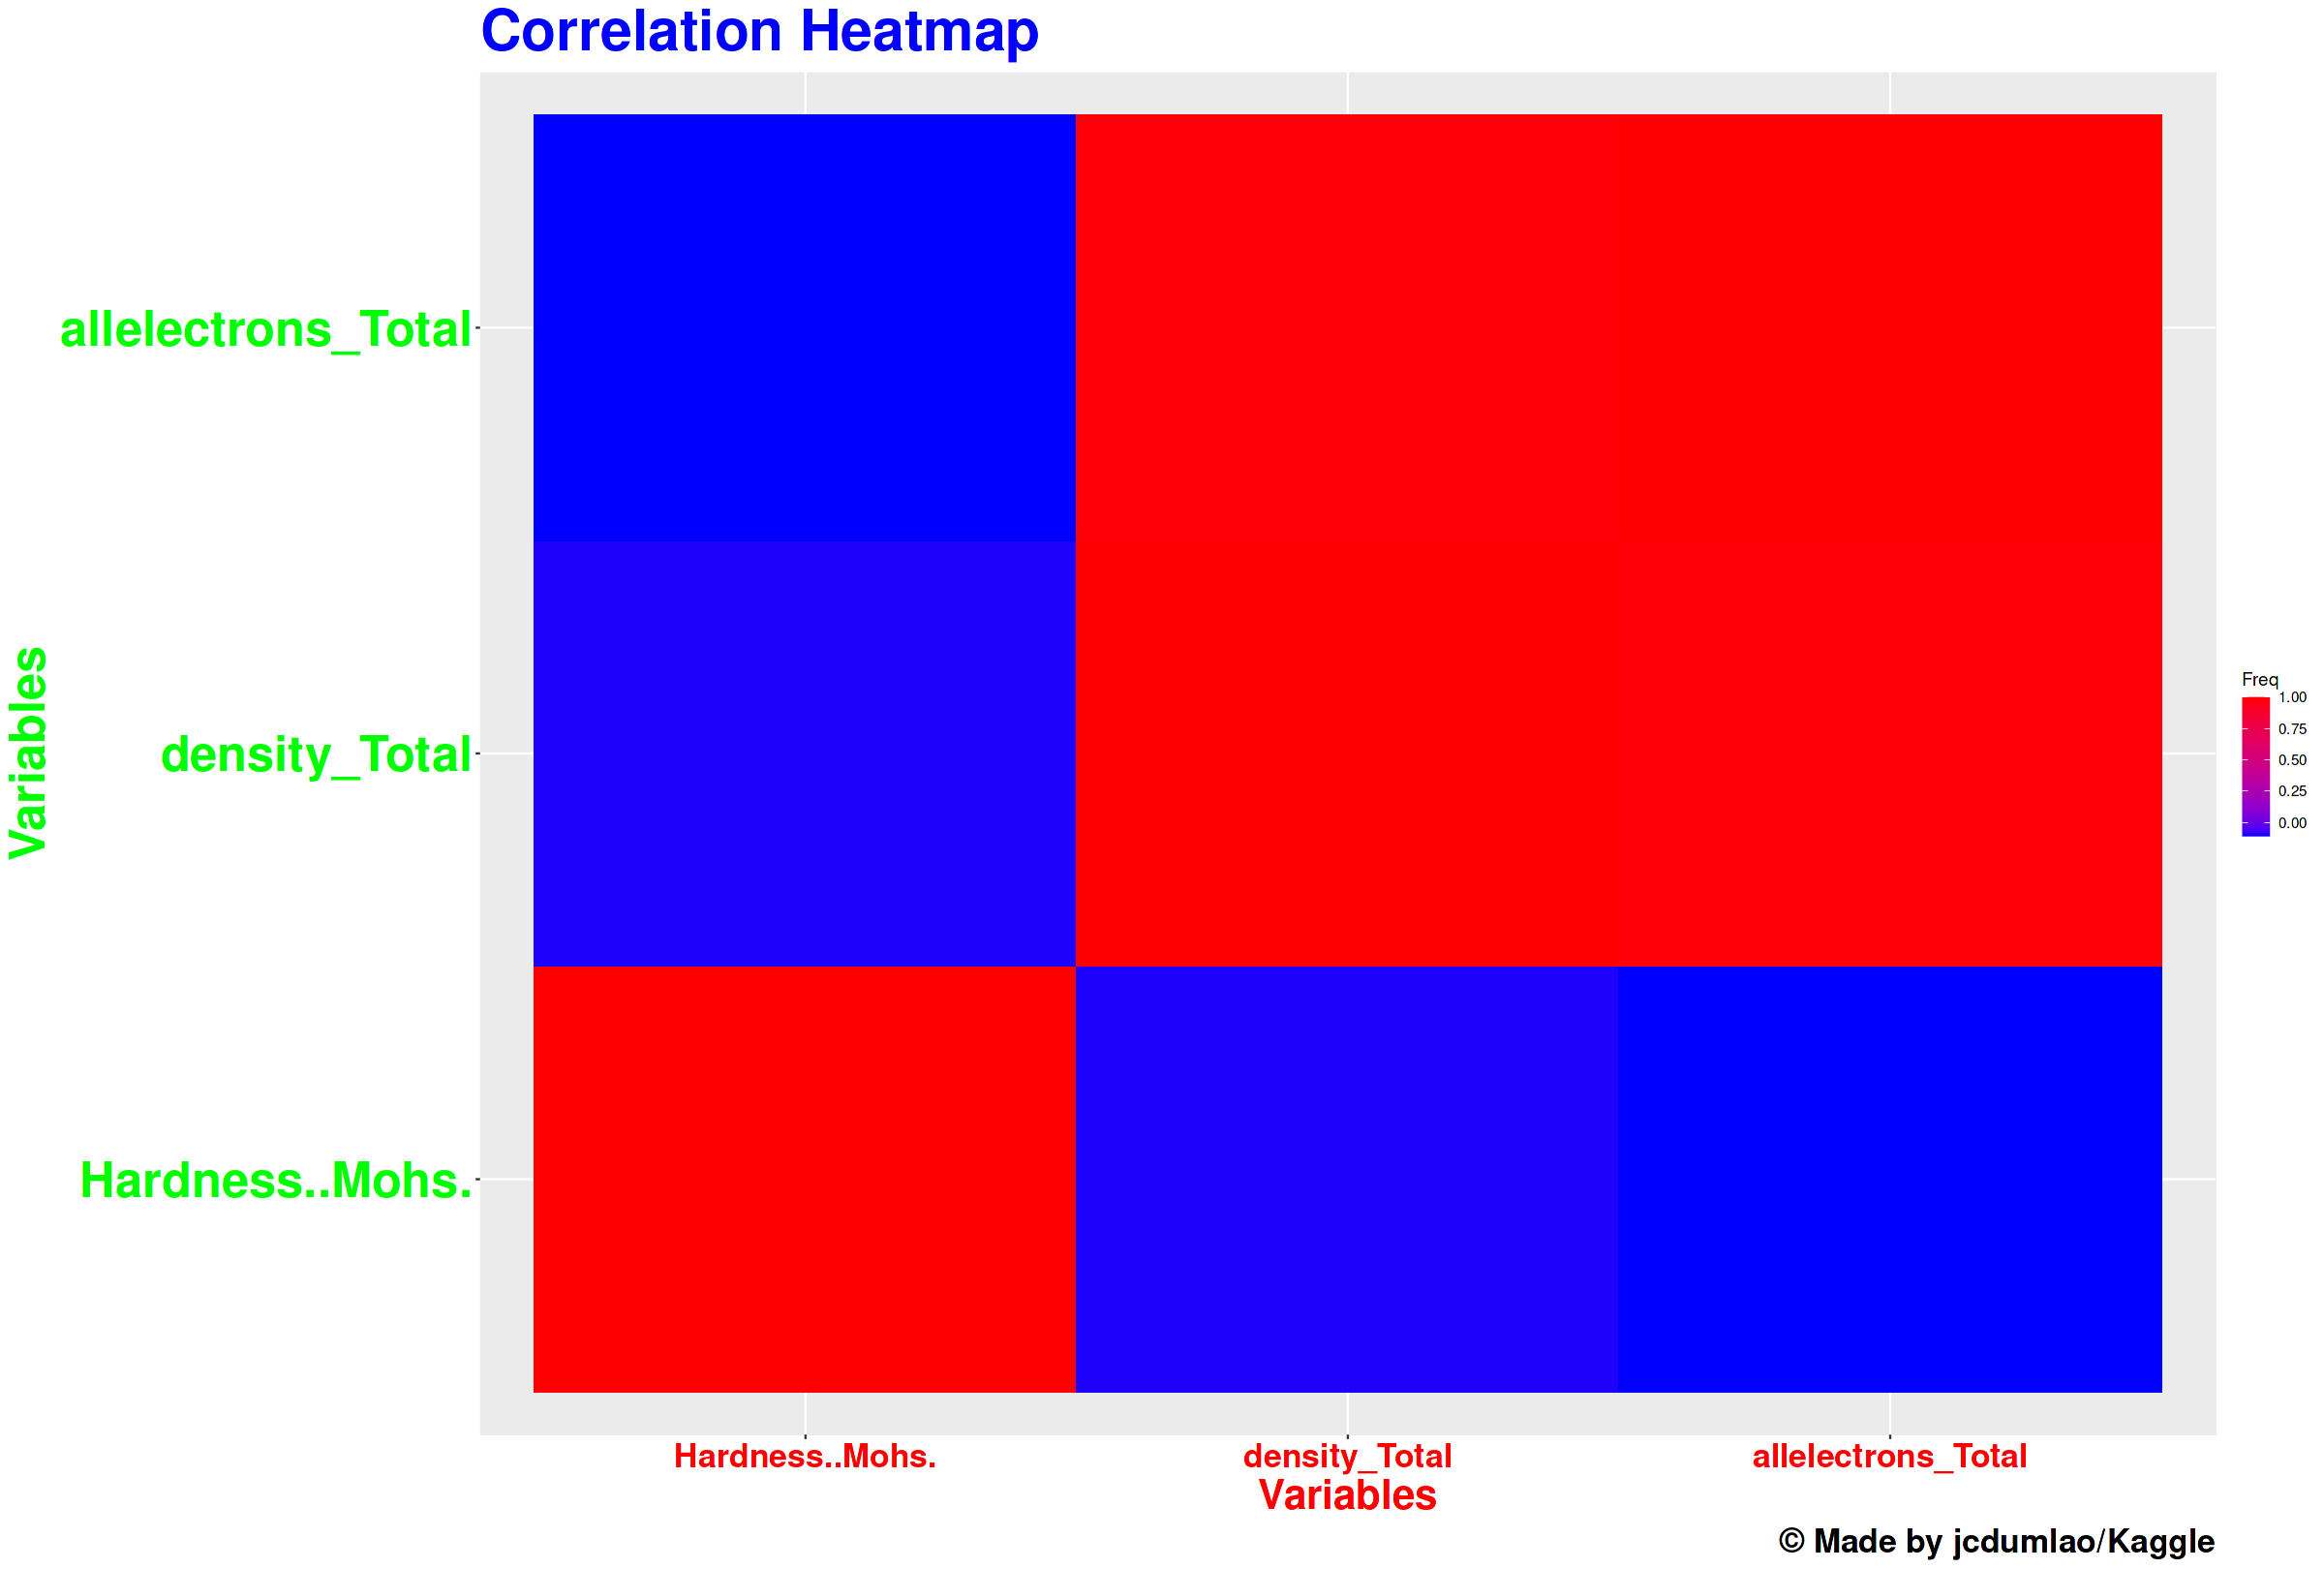

In [11]:
# Calculate the correlation matrix
corr_matrix <- cor(data[, c("Hardness..Mohs.", "density_Total", "allelectrons_Total")])

# Create a heatmap
ggplot(data = as.data.frame(as.table(corr_matrix)), aes(x = Var1, y = Var2, fill = Freq)) +
  geom_tile() +
  scale_fill_gradient(low = "blue", high = "red") +
  labs(title = "Correlation Heatmap",
       caption = "© Made by jcdumlao/Kaggle",
       x = "Variables",
       y = "Variables") +
  theme(
    plot.title = element_text(size = 35, color = "blue", face = "bold"),
    plot.caption = element_text(size = 20,face = "bold"),
    axis.title.x = element_text(size = 25, color = "red", face = "bold"),
    axis.title.y = element_text(size = 30, color = "green", face = "bold"),
    axis.text.x = element_text(size = 20, color = "red", face = "bold"),
    axis.text.y = element_text(size = 30, color = "green", face = "bold")
  )

# Save the plot
ggsave("Correlation Heatmap.png", plot = last_plot(), width = 18, height = 6)

# Print correlation matrix
print(corr_matrix)


🟪 Correlation Heatmap:

* The heatmap visualizes the correlation coefficients between Hardness, Density, and Total Electrons. The values range from -1 to 1, with higher absolute values indicating stronger correlations. We observe a positive correlation between Hardness and Density (-0.09), suggesting that as hardness increases, density tends to increase as well. Additionally, there is a weaker positive correlation between Hardness and Total Electrons (-0.10). This information helps us understand the relationships between these variables.

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



,Hardness..Mohs.,density_Total,allelectrons_Total
Hardness..Mohs.,1.00000000,-0.09936229,-0.1092782
density_Total,-0.09936229,1.00000000,0.9879471
allelectrons_Total,-0.10927824,0.98794708,1.0000000


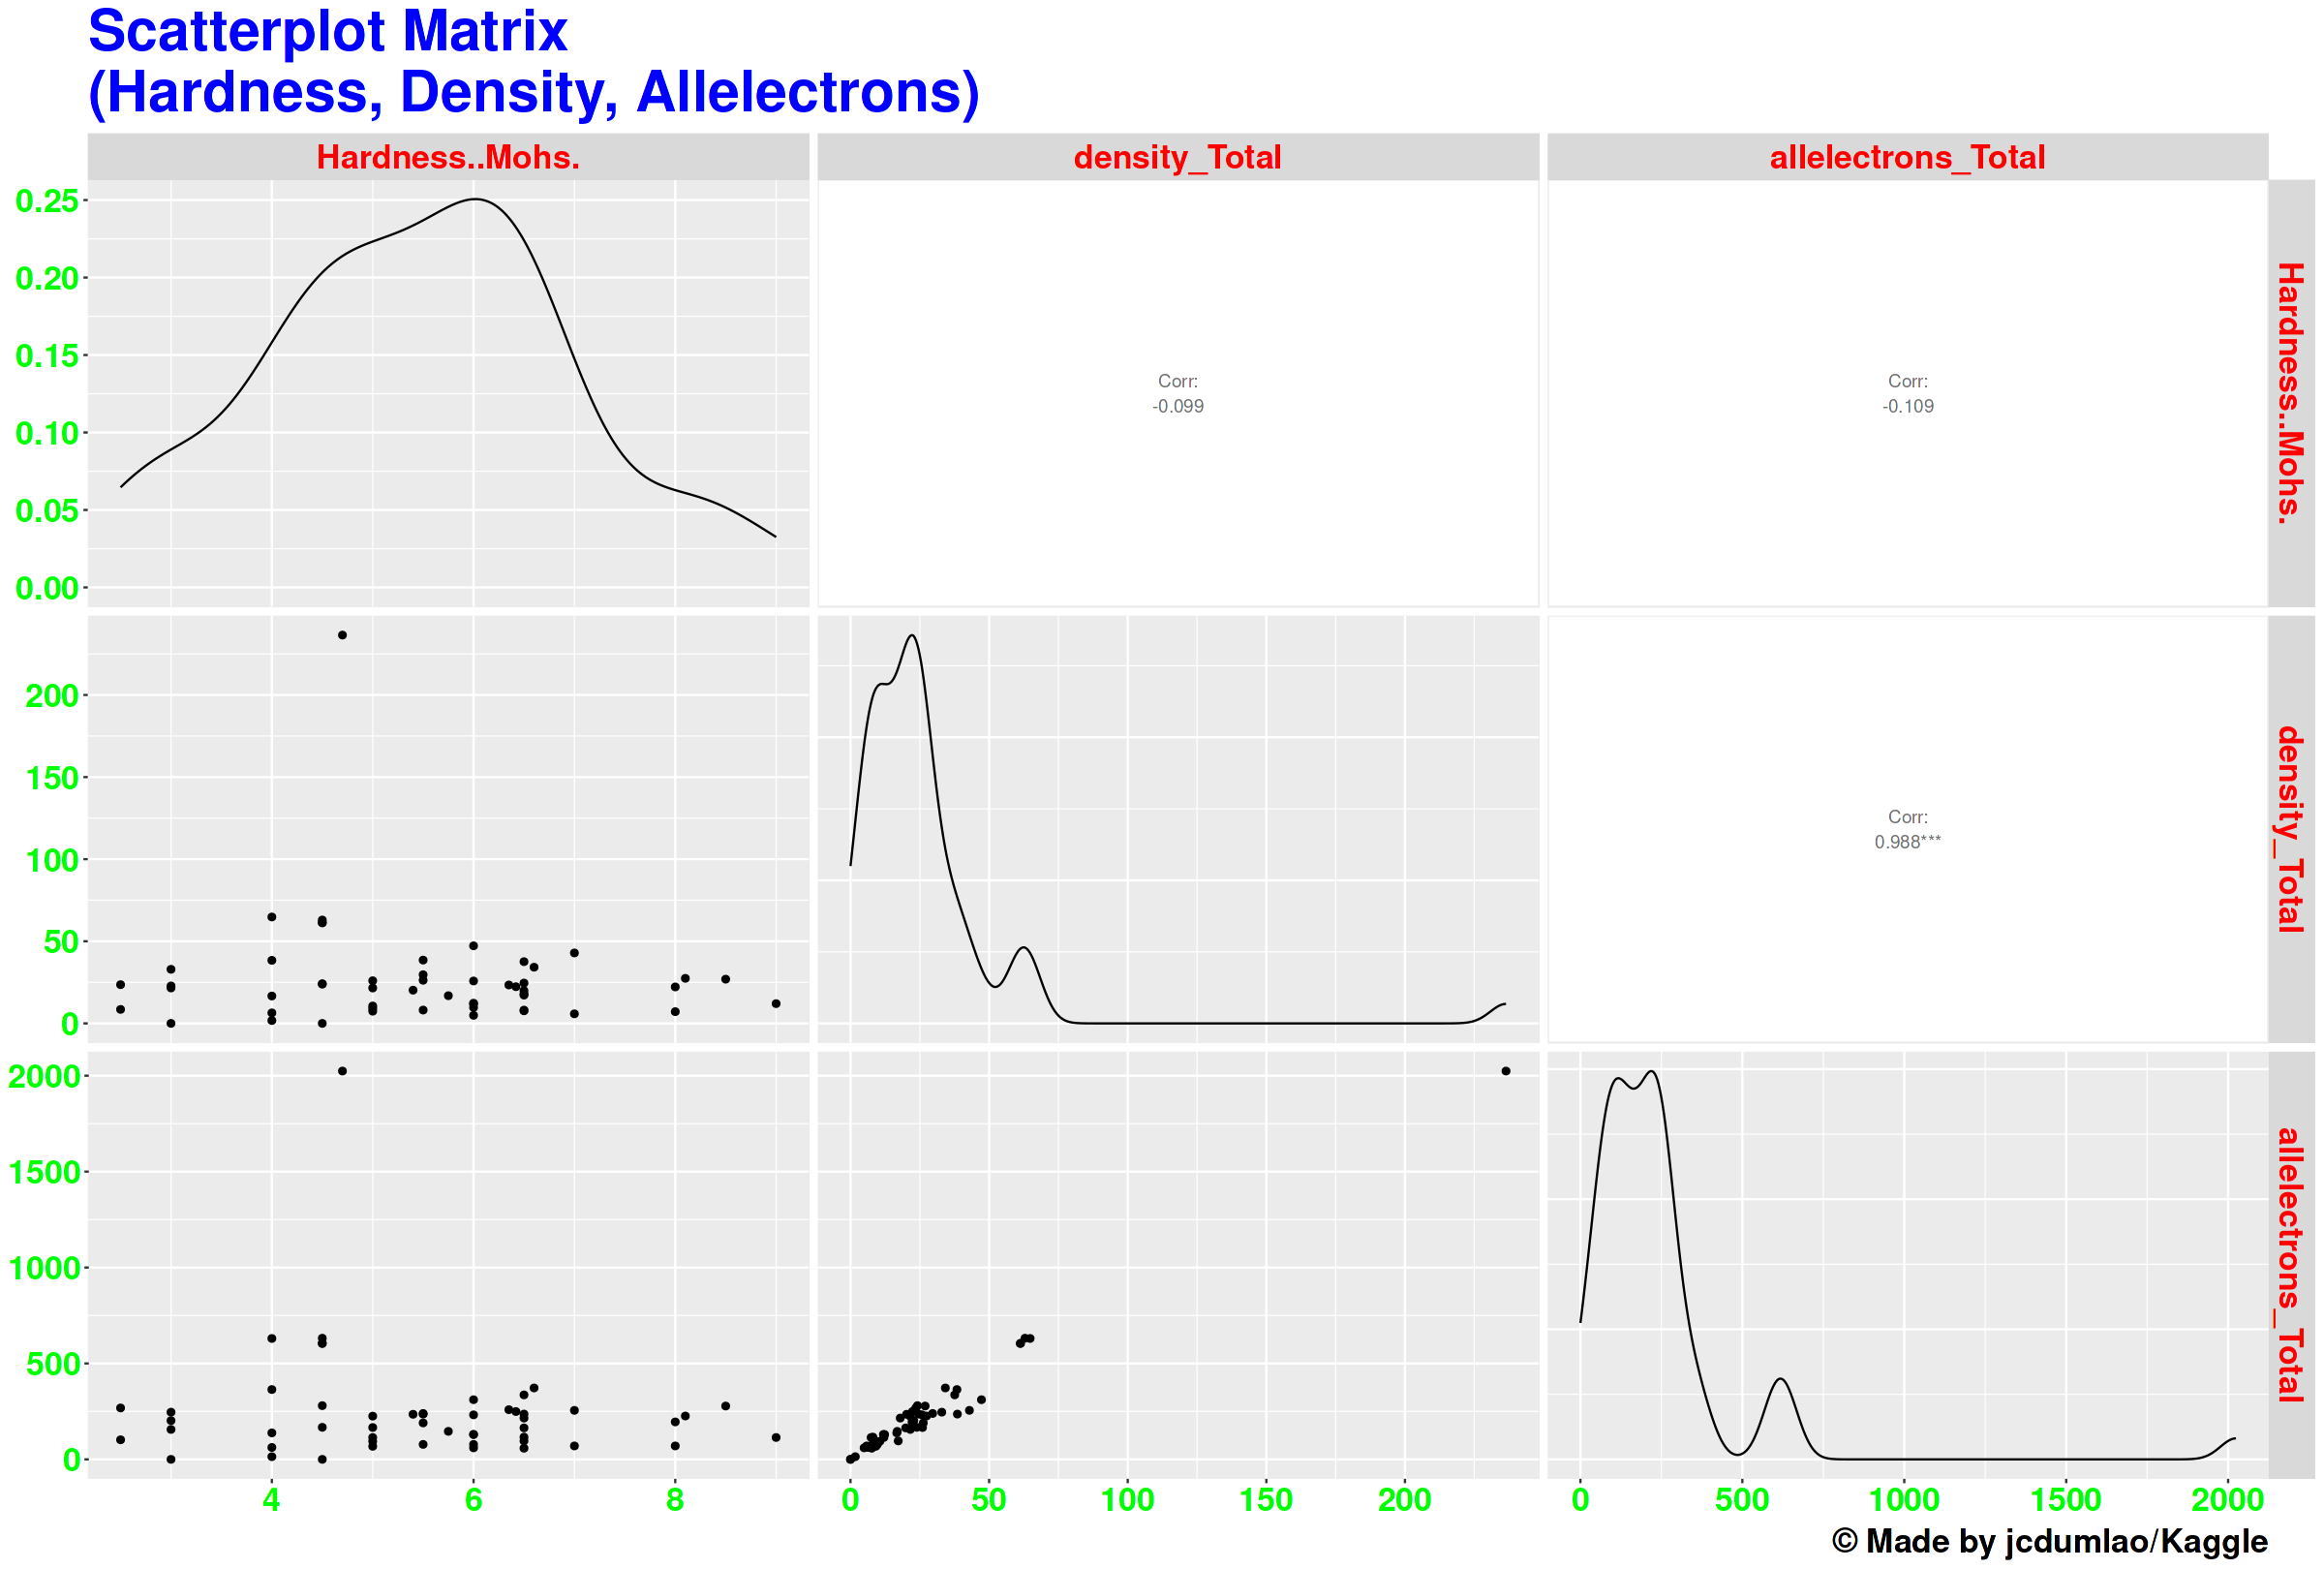

In [12]:
library(GGally)

suppressWarnings({
  library(GGally)
  # Select relevant columns for the scatterplot matrix
  data_subset <- data[, c("Hardness..Mohs.", "density_Total", "allelectrons_Total")]

  # Create the scatterplot matrix with modified title
  ggpairs(data_subset) +
    labs(title = "Scatterplot Matrix\n(Hardness, Density, Allelectrons)",
         caption = "© Made by jcdumlao/Kaggle") +
    theme(
      plot.title = element_text(size = 35, color = "blue", face = "bold"),
      plot.caption = element_text(size = 20,face = "bold"),
      strip.text = element_text(size = 20, color = "red", face = "bold"),  # Adjust strip text size if needed
      axis.text = element_text(size = 20, color = "green", face = "bold"),  # Adjust font size of axis labels
      text = element_text(size = 20)  # Adjust font size of text inside cells
    )
})

# Save the plot
ggsave("scatterplot_matrix.png", plot = last_plot(), width = 18, height = 4)

# Print correlation coefficients for each pair
cor(data_subset)


🟪 Scatterplot Matrix:Hardness, Density, and Total Electrons

* The scatterplot matrix provides a visual representation of the relationships between Hardness, Density, and Total Electrons. Each scatterplot shows the correlation between two variables. For example, the plot of Hardness vs. Density reveals a positive linear relationship, supporting the observation from the correlation heatmap. Additionally, the plot of Total Electrons vs. Density shows a less clear pattern, indicating a weaker correlation.



                    cubic    hexagonal   monoclinic orthorhombic  rhomohedral 
           1            4            7           15            6            3 
  tetragonal     trigonal 
           7            9 

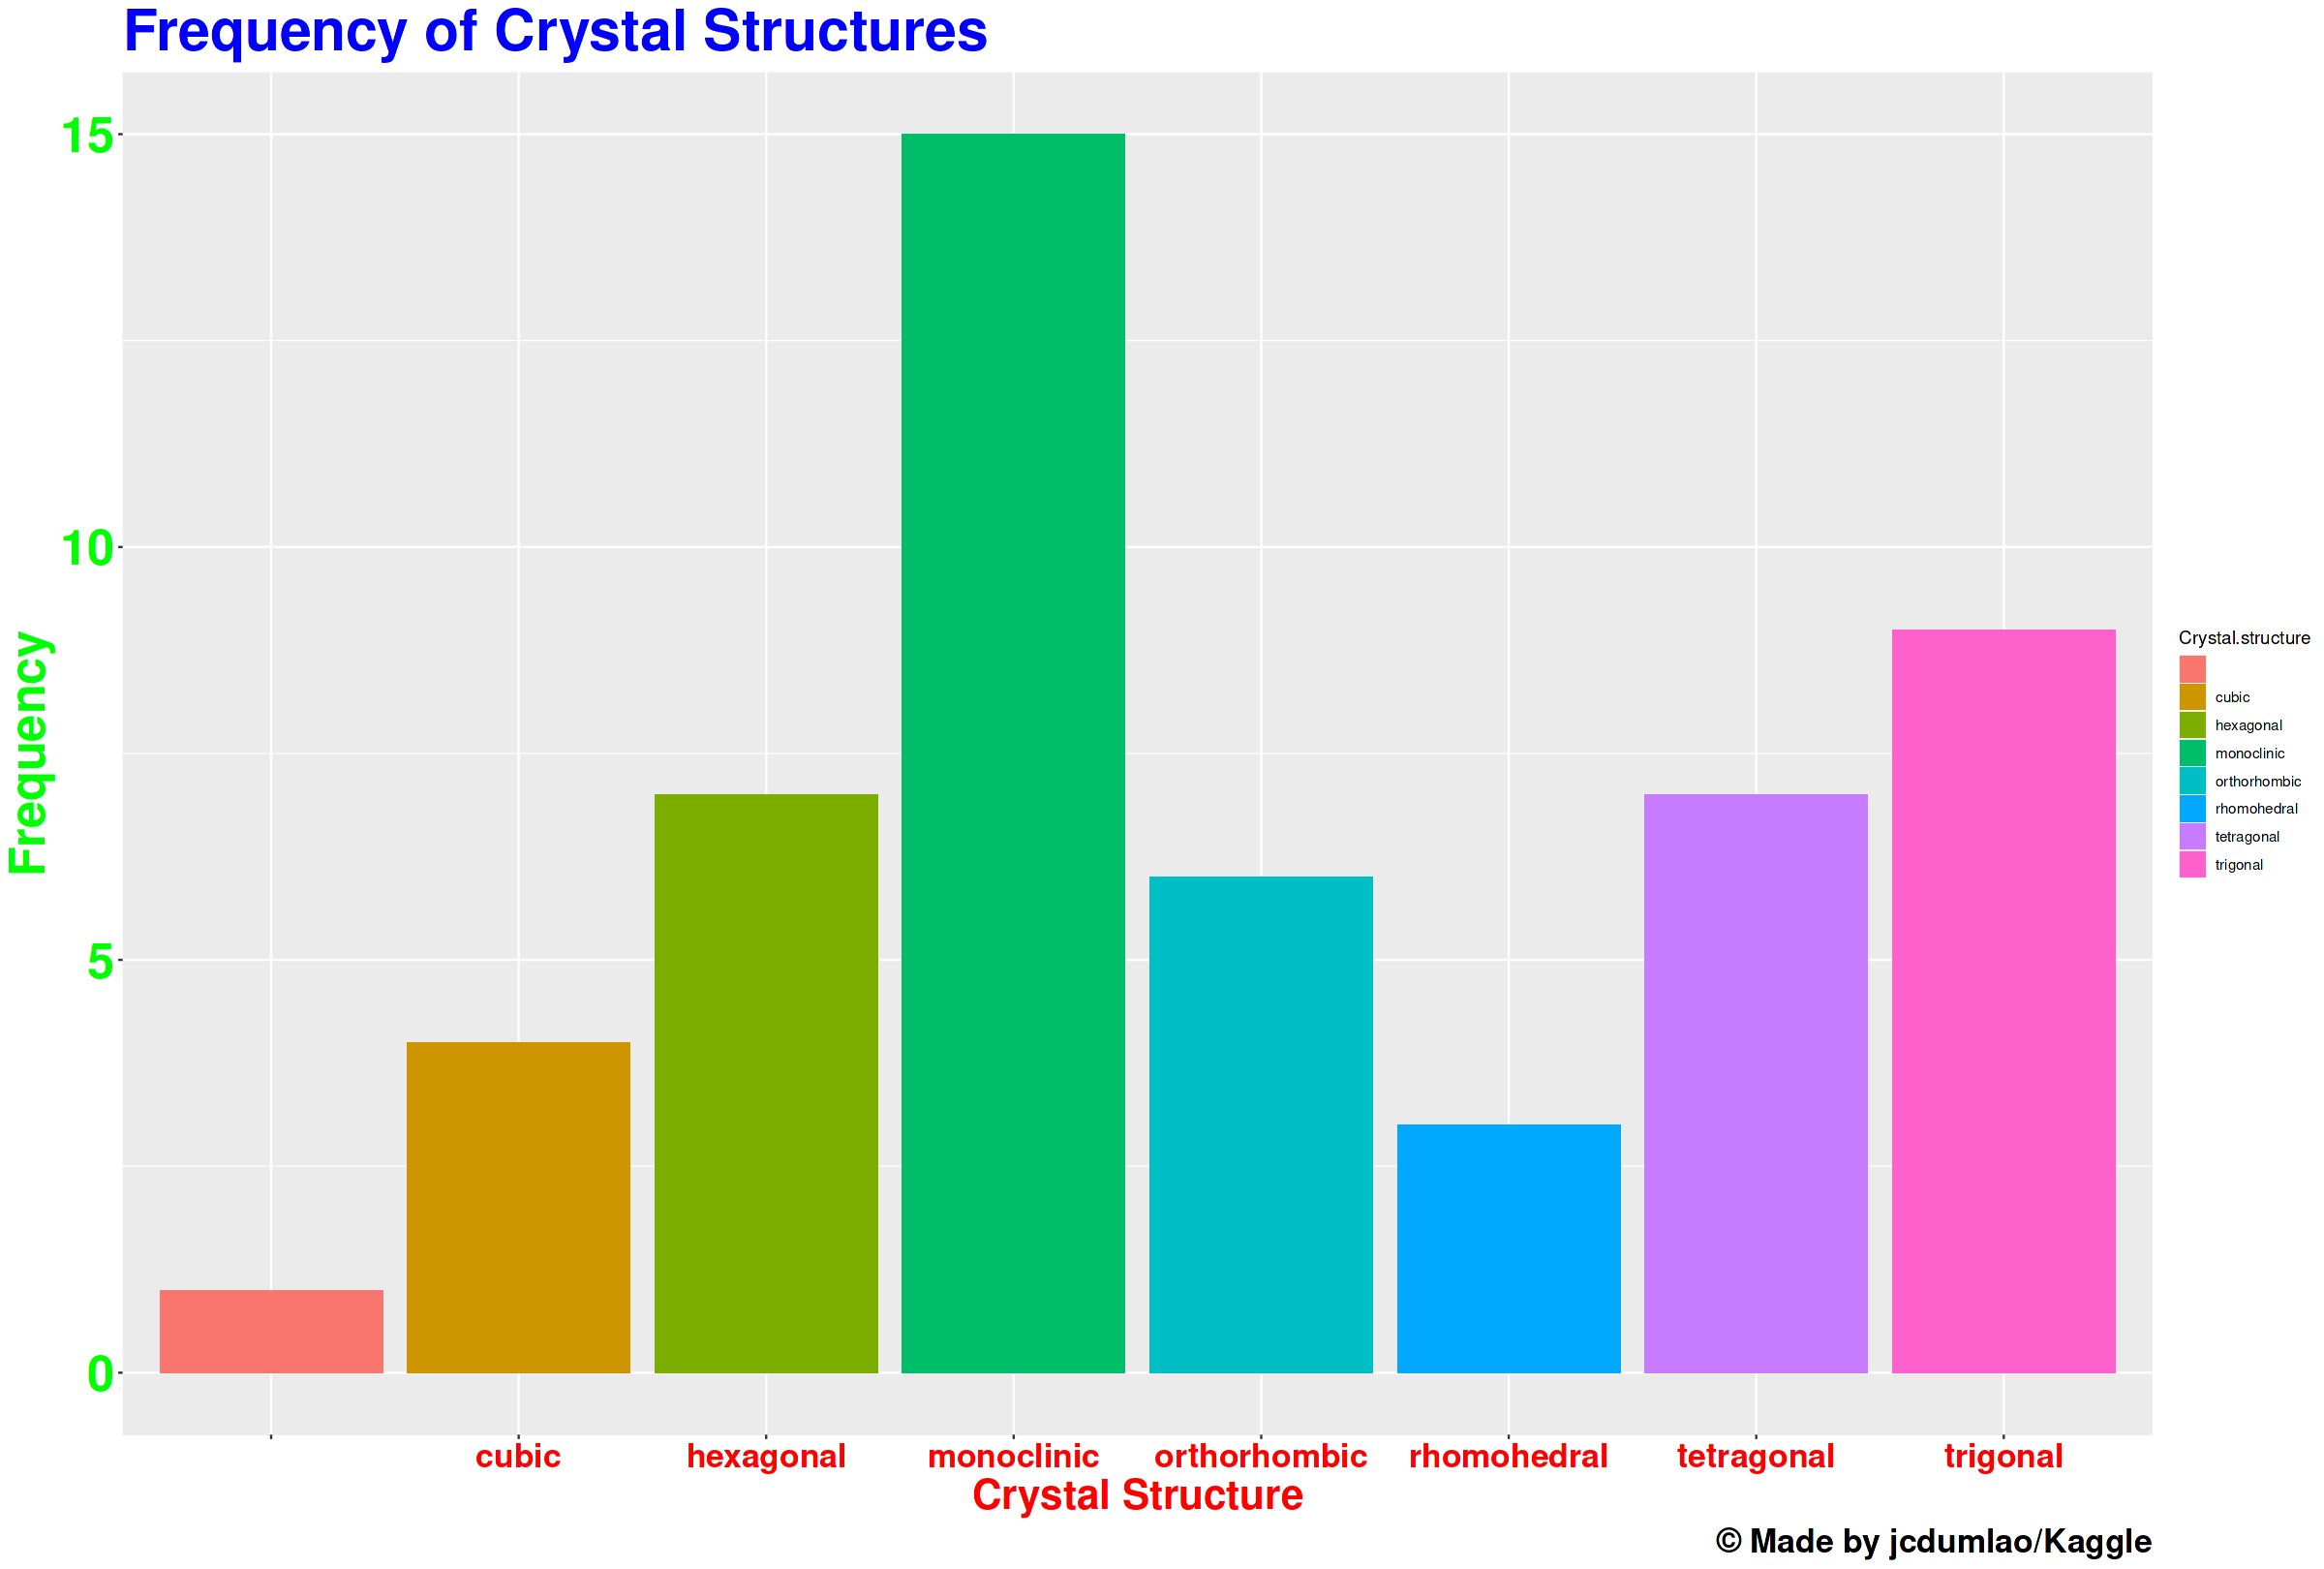

In [13]:
ggplot(data, aes(x = Crystal.structure, fill = Crystal.structure)) +
  geom_bar() +
  labs(title = "Frequency of Crystal Structures",
       caption = "© Made by jcdumlao/Kaggle",
       x = "Crystal Structure",
       y = "Frequency") +
  theme(
    plot.title = element_text(size = 35, color = "blue", face = "bold"),
    plot.caption = element_text(size = 20,face = "bold"),
    axis.title.x = element_text(size = 25, color = "red", face = "bold"),
    axis.title.y = element_text(size = 30, color = "green", face = "bold"),
    axis.text.x = element_text(size = 20, color = "red", face = "bold"),
    axis.text.y = element_text(size = 30, color = "green", face = "bold")
  )

# Print frequency counts for each Crystal Structure
table(data$Crystal.structure)

# Save the plot
ggsave("Frequency of Crystal Structures.png", plot = last_plot(), width = 18, height = 6)


🟪 Frequency of Crystal Structures:

* This bar plot displays the frequency of different crystal structures in the dataset. The most common crystal structure is "trigonal", followed by "monoclinic" and "tetragonal". Less common structures include "rhomohedral", "orthorhombic", "hexagonal", and "cubic". This information is valuable for understanding the distribution of crystal structures within the dataset.

# <div style="color:white;display:inline-block;border-radius:5px;background-color:#009688;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:85%;letter-spacing:0.5px;margin:0"><b> </b>Mineral</p></div>


In [14]:
head <- mineral_data[sample(1:nrow(mineral_data),5),]
head

,X,Hardness,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
409,414,5.3,61,14.63200,30.5000,3.500000,66.80750,8.71425,1.960000,1.910000,1.185,0.4587700,7.316000
422,427,5.5,64,10.20800,12.8000,4.800000,26.38522,11.38168,2.810000,1.740000,0.860,0.4928200,2.041599
156,157,2.5,90,11.46400,18.0000,5.600000,39.56806,12.08630,2.868000,1.652000,0.864,0.4761960,2.292799
367,372,5.5,156,25.57332,13.0000,4.166667,27.12565,10.77601,2.619167,1.775000,0.950,0.4878133,2.131110
203,207,5.5,366,33.24197,11.4375,4.625000,23.56095,10.85111,2.634063,1.791562,0.945,0.4927231,1.038812


In [15]:
summary(mineral_data)

       X            Hardness      allelectrons_Total density_Total   
 Min.   :  0.0   Min.   : 1.000   Min.   :    0.00   Min.   :  0.00  
 1st Qu.:157.2   1st Qu.: 3.000   1st Qu.:   98.25   1st Qu.: 10.56  
 Median :315.5   Median : 5.500   Median :  186.50   Median : 20.74  
 Mean   :315.2   Mean   : 4.614   Mean   :  312.90   Mean   : 27.86  
 3rd Qu.:472.8   3rd Qu.: 5.950   3rd Qu.:  390.00   3rd Qu.: 34.82  
 Max.   :630.0   Max.   :10.000   Max.   :15300.00   Max.   :643.09  
 allelectrons_Average val_e_Average   atomicweight_Average ionenergy_Average
 Min.   : 0.000       Min.   :0.000   Min.   :  0.00       Min.   : 0.00    
 1st Qu.: 9.372       1st Qu.:4.058   1st Qu.: 18.83       1st Qu.:10.96    
 Median :10.853       Median :4.636   Median : 22.20       Median :11.36    
 Mean   :14.808       Mean   :4.419   Mean   : 32.24       Mean   :11.11    
 3rd Qu.:17.417       3rd Qu.:4.800   3rd Qu.: 38.85       3rd Qu.:11.80    
 Max.   :67.000       Max.   :6.000   Max.   :16

   AtomicNumber VdW_Radius Covalent_Radius
1            12        154             154
2            13        204             133
3            14        210             110
4            15        185             102
5            16        180             102
6            17        188             102
7            18        167             106
8            19        170             102
9            20        154             126
10           21        211             139
11           22        185             125
12           23        155             122
13           24        142             119
14           25        140             116


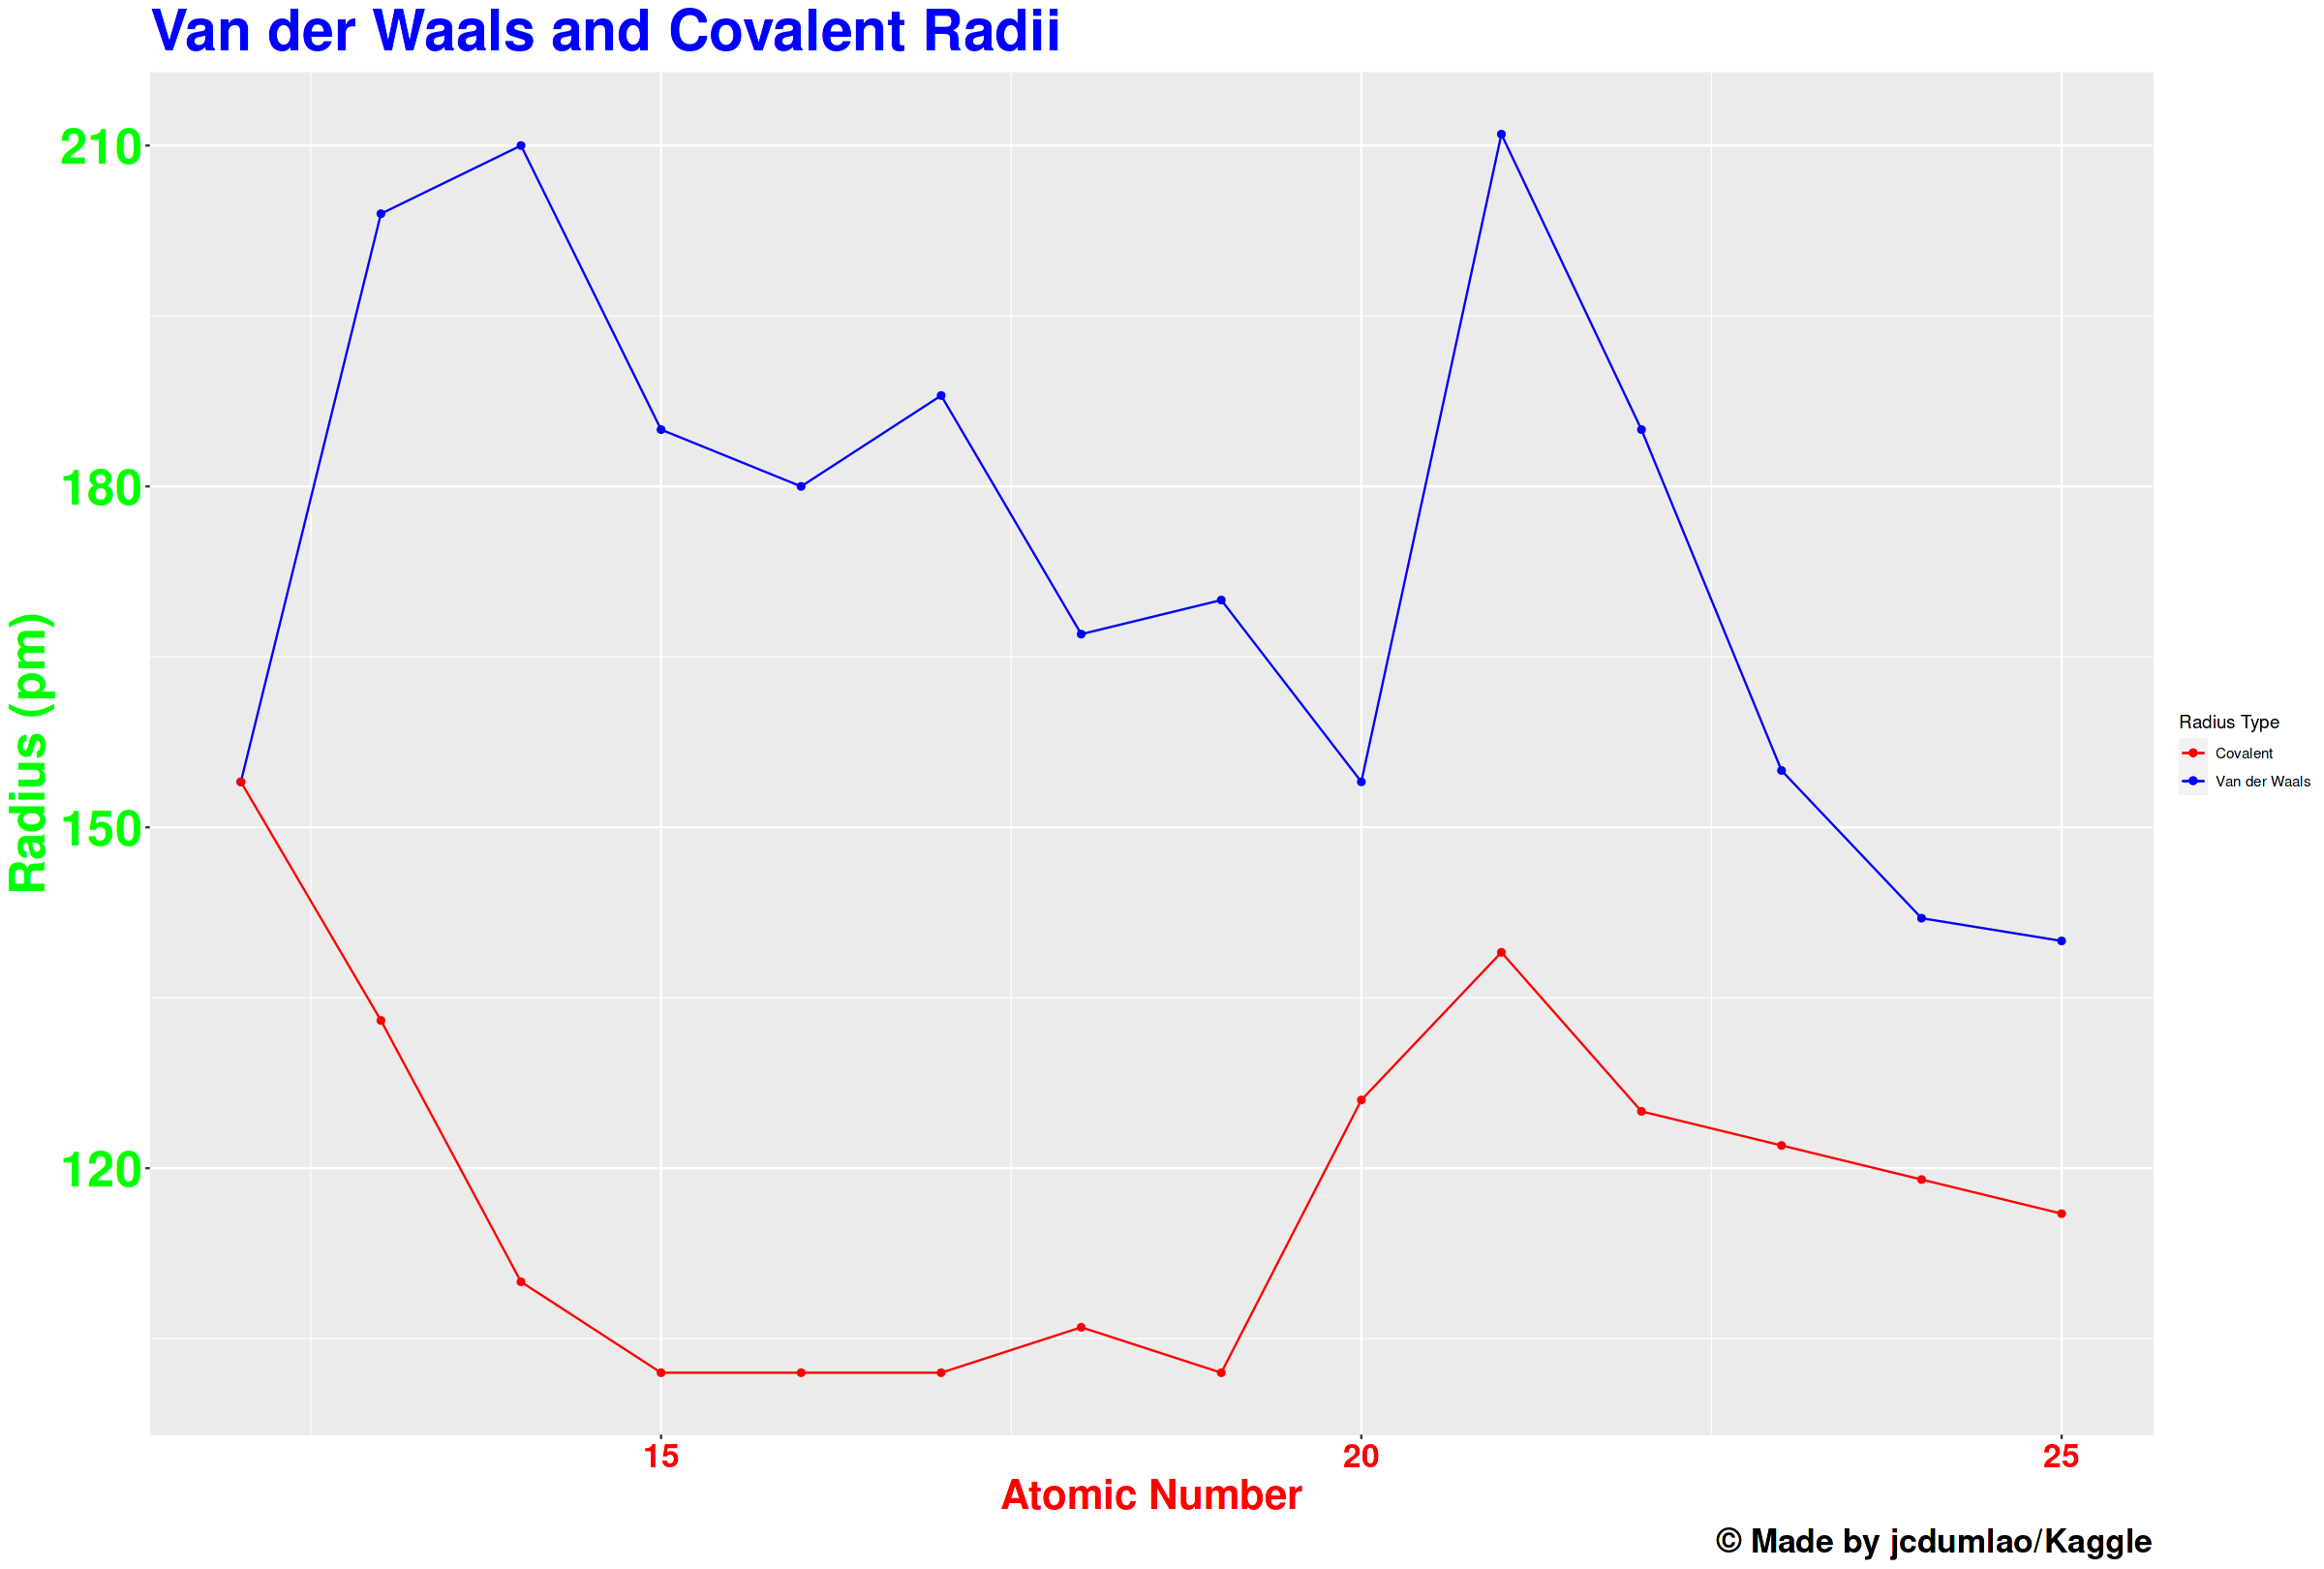

In [16]:
# Assuming your data is in a data.frame named 'mineral_data'

# Define atomic numbers (Z) for each element in the dataset
atomic_numbers <- c(12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25)

# Define van der Waals radii (in picometers, pm)
vdw_radii <- c(154, 204, 210, 185, 180, 188, 167, 170, 154, 211, 185, 155, 142, 140)

# Define covalent radii (in picometers, pm)
covalent_radii <- c(154, 133, 110, 102, 102, 102, 106, 102, 126, 139, 125, 122, 119, 116)

# Combine atomic numbers, van der Waals, and covalent radii into a data.frame
radii_data <- data.frame(AtomicNumber = atomic_numbers, VdW_Radius = vdw_radii, Covalent_Radius = covalent_radii)

# Print the radii data
print(radii_data)

# Plotting van der Waals and covalent radii
library(ggplot2)

ggplot(radii_data, aes(x = AtomicNumber, y = VdW_Radius, color = "Van der Waals")) +
  geom_point() +
  geom_line() +
  geom_point(aes(y = Covalent_Radius, color = "Covalent")) +
  geom_line(aes(y = Covalent_Radius, color = "Covalent")) +
  labs(title = "Van der Waals and Covalent Radii",
       caption = "© Made by jcdumlao/Kaggle",
       x = "Atomic Number",
       y = "Radius (pm)",
       color = "Radius Type") +
  scale_color_manual(values = c("Van der Waals" = "blue", "Covalent" = "red")) +
  theme(
    plot.title = element_text(size = 35, color = "blue", face = "bold"),
    plot.caption = element_text(size = 20,face = "bold"),
    axis.title.x = element_text(size = 25, color = "red", face = "bold"),
    axis.title.y = element_text(size = 30, color = "green", face = "bold"),
    axis.text.x = element_text(size = 20, color = "red", face = "bold"),
    axis.text.y = element_text(size = 30, color = "green", face = "bold")
  )

# Save the plot
ggsave("Van der Waals and Covalent Radii.png", plot = last_plot(), width = 18, height = 6)


🟪 Van der Waals radii and covalent radii provide crucial information about the size of atoms and their bonding behavior. The dataset, spanning various minerals, allows us to explore these radii across different chemical compositions and crystal systems. The plot illustrates how these radii vary with atomic number, highlighting the differences between van der Waals and covalent radii. This information is invaluable in understanding the interactions and properties of minerals in diverse applications such as ceramics and abrasives.

In [17]:
# Define atomic numbers for each element in the dataset
atomic_numbers <- c(12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25)

# Define valence electron counts
valence_electron_counts <- c(2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7)

# Combine atomic numbers and valence electron counts into a data.frame
valence_data <- data.frame(AtomicNumber = atomic_numbers, ValenceElectronCount = valence_electron_counts)

# Print the valence data
print(valence_data)


   AtomicNumber ValenceElectronCount
1            12                    2
2            13                    3
3            14                    4
4            15                    5
5            16                    6
6            17                    7
7            18                    8
8            19                    1
9            20                    2
10           21                    3
11           22                    4
12           23                    5
13           24                    6
14           25                    7


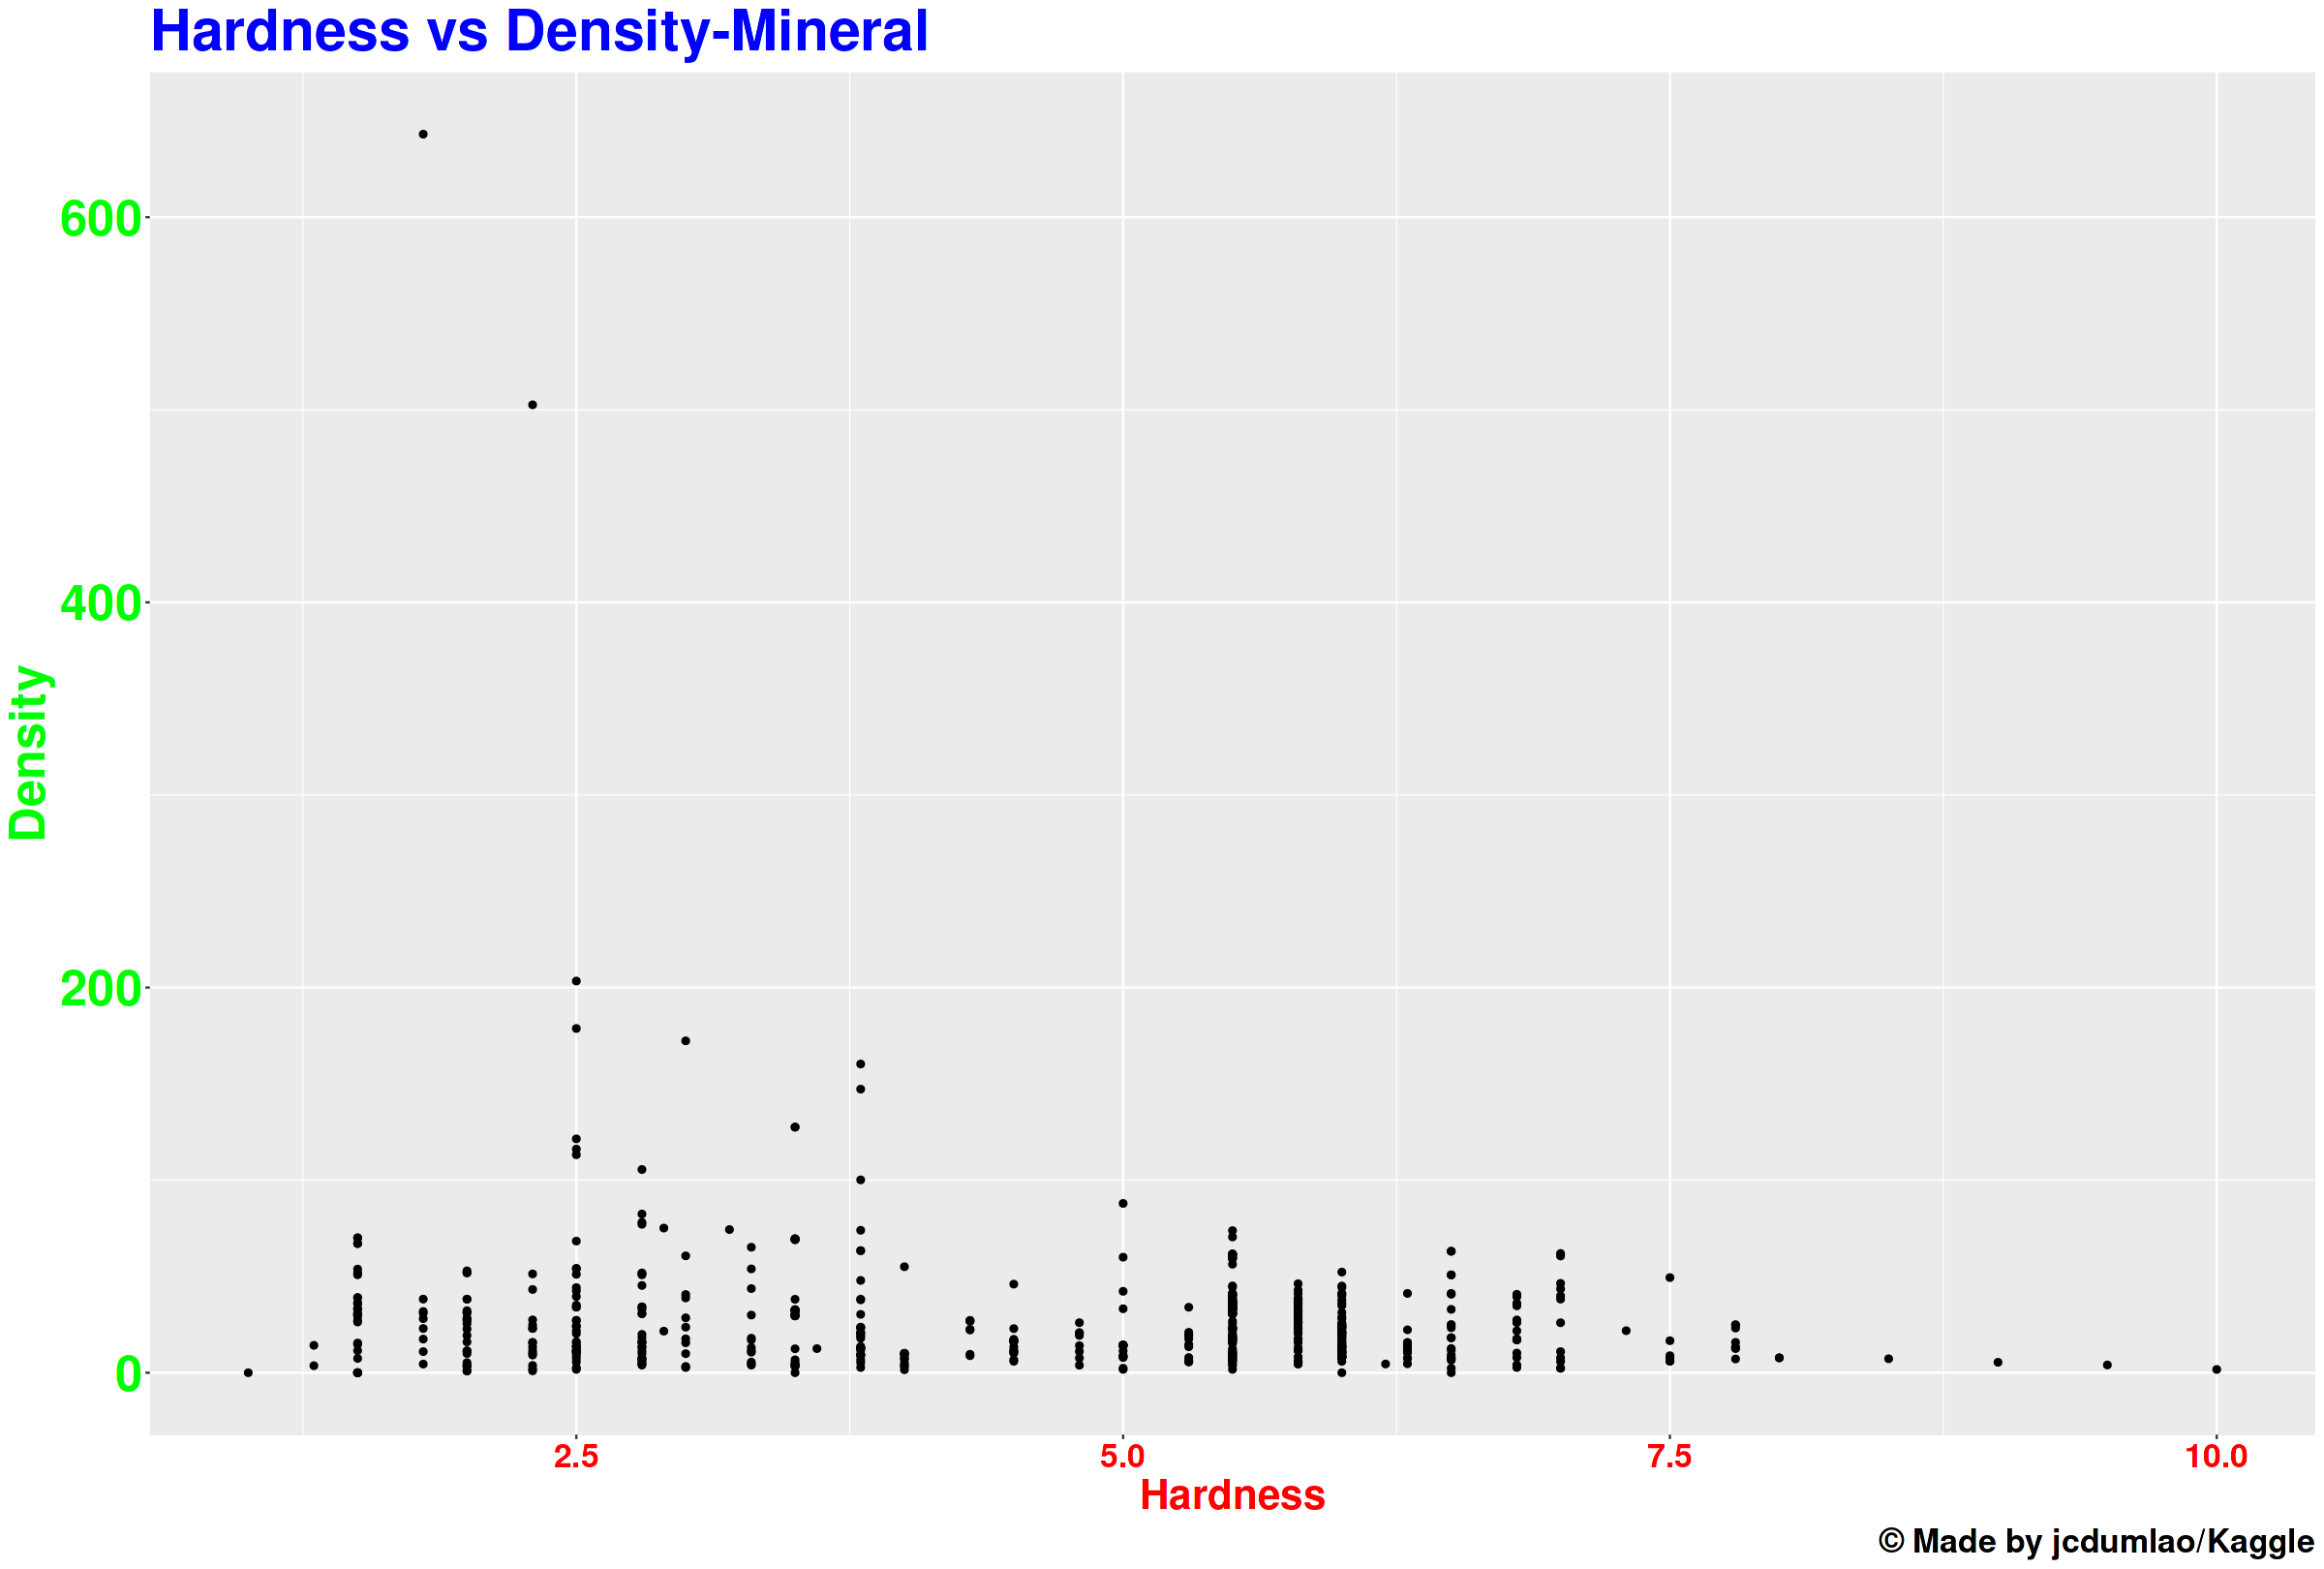

Mean Hardness: 4.613987 
Mean Density: 27.86484 


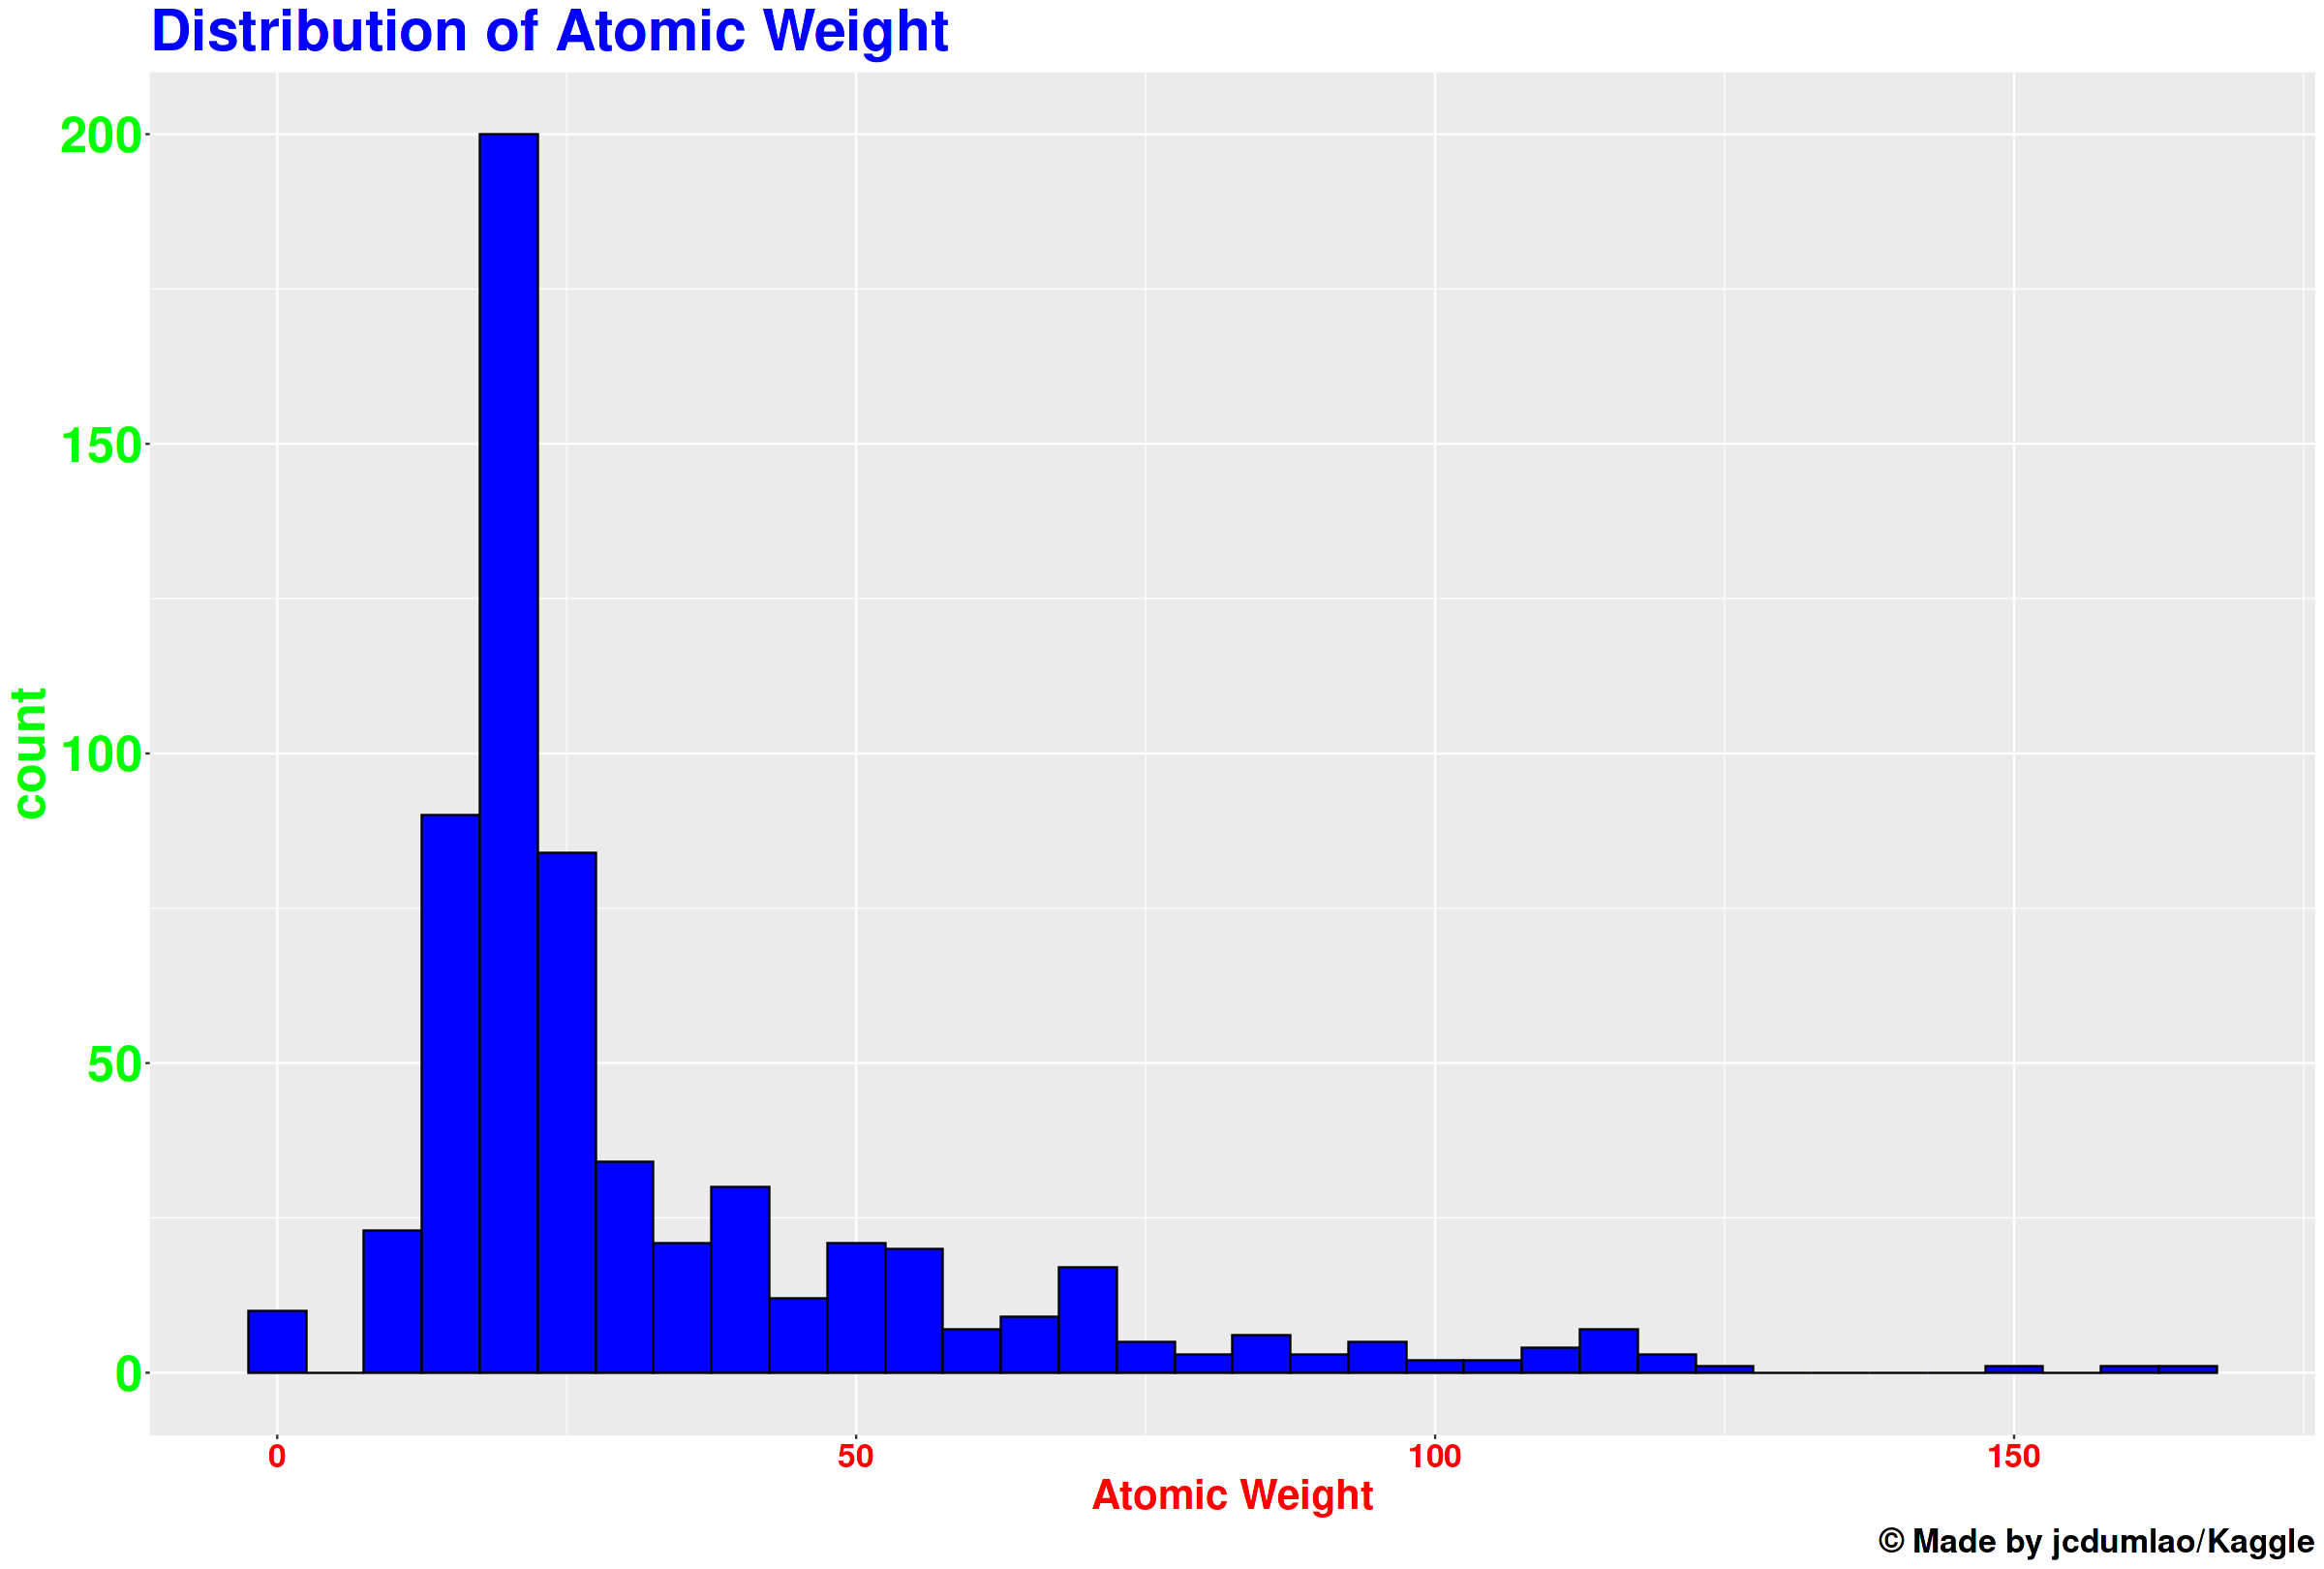

In [18]:
# Descriptive Statistics
mean_hardness <- mean(mineral_data$Hardness)
mean_density <- mean(mineral_data$density_Total)

# Generate Visualizations
library(ggplot2)

# Visualization 1: Scatter plot of Hardness vs Density
ggplot(mineral_data, aes(x = Hardness, y = density_Total)) +
  geom_point() +
  labs(title = "Hardness vs Density-Mineral",
       caption = "© Made by jcdumlao/Kaggle",
       x = "Hardness",
       y = "Density") +
  theme(
    plot.title = element_text(size = 35, color = "blue", face = "bold"),
    plot.caption = element_text(size = 20,face = "bold"),
    axis.title.x = element_text(size = 25, color = "red", face = "bold"),
    axis.title.y = element_text(size = 30, color = "green", face = "bold"),
    axis.text.x = element_text(size = 20, color = "red", face = "bold"),
    axis.text.y = element_text(size = 30, color = "green", face = "bold")
  )
  

# Visualization 2: Histogram of Atomic Weight
ggplot(mineral_data, aes(x = atomicweight_Average)) +
  geom_histogram(binwidth = 5, fill = "blue", color = "black") +
  labs(title = "Distribution of Atomic Weight",
       caption = "© Made by jcdumlao/Kaggle",
       x = "Atomic Weight") +
  theme(
    plot.title = element_text(size = 35, color = "blue", face = "bold"),
    plot.caption = element_text(size = 20,face = "bold"),
    axis.title.x = element_text(size = 25, color = "red", face = "bold"),
    axis.title.y = element_text(size = 30, color = "green", face = "bold"),
    axis.text.x = element_text(size = 20, color = "red", face = "bold"),
    axis.text.y = element_text(size = 30, color = "green", face = "bold")
  )
  
# Print Results
cat("Mean Hardness:", mean_hardness, "\n")
cat("Mean Density:", mean_density, "\n")

# Save the plot
ggsave("Hardness vs Density-Mineral.png", plot = last_plot(), width = 18, height = 6)
ggsave("Distribution of Atomic Weight.png", plot = last_plot(), width = 18, height = 6)



# <div style="color:white;display:inline-block;border-radius:5px;background-color:#009688;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:85%;letter-spacing:0.5px;margin:0"><b> </b>Build a Model and Prediction</p></div>

In [19]:
library(caret)

# Define predictors and target variable
predictors <- c("Hardness", "allelectrons_Total", "density_Total", "allelectrons_Average", 
                "val_e_Average", "atomicweight_Average", "ionenergy_Average", "el_neg_chi_Average", 
                "R_vdw_element_Average", "R_cov_element_Average", "zaratio_Average", "density_Average")
target <- "X"

# Step 1: Split Data into Training and Testing Sets
set.seed(123)
trainIndex <- createDataPartition(mineral_data$X, p = .8, 
                                  list = FALSE, 
                                  times = 1)
train_data <- mineral_data[ trainIndex,]
test_data  <- mineral_data[-trainIndex,]

# Step 2: Train a Linear Regression Model
model_lm <- lm(X ~ ., data = train_data)

# Step 3: Make Predictions
predictions <- predict(model_lm, newdata = test_data)

# Step 4: Evaluate the Model
mae <- mean(abs(predictions - test_data$X))
rmse <- sqrt(mean((predictions - test_data$X)^2))
r_squared <- 1 - sum((test_data$X - predictions)^2) / sum((test_data$X - mean(test_data$X))^2)

# Print Results
cat("Mean Absolute Error (MAE):", mae, "\n")
cat("Root Mean Squared Error (RMSE):", rmse, "\n")
cat("R-squared (R2) Value:", r_squared, "\n")


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




Mean Absolute Error (MAE): 152.9132 
Root Mean Squared Error (RMSE): 181.6751 
R-squared (R2) Value: -0.005481603 


**1. Mean Absolute Error (MAE): 152.9132**

* The Mean Absolute Error (MAE) measures the average absolute difference between the predicted values and the actual values. In this case, the MAE of approximately 152.91 indicates that, on average, our model's predictions deviate by about 152.91 units from the actual values.

**2. Root Mean Squared Error (RMSE): 181.6751**

* The Root Mean Squared Error (RMSE) is another measure of the average prediction error, but it gives more weight to larger errors. The RMSE of around 181.68 suggests that the model's predictions tend to have larger deviations from the actual values compared to the MAE.

**3. R-squared (R2) Value: -0.005481603**

* The R-squared (R2) value assesses how well the model fits the data. A negative R2 value indicates that the model does not perform better than a model that simply predicts the mean of the target variable for all observations. In this case, the model is not effectively capturing the variance in the data.

The regression model we developed appears to have limited predictive power for this dataset. The Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) are both relatively high, indicating that the model's predictions have substantial deviations from the actual values. This suggests that there might be underlying complexities in the data that the model is not able to capture.

Furthermore, the negative R-squared (R2) value indicates that the model does not perform better than a simple model that predicts the mean of the target variable for all observations. This implies that the features we have used may not be strongly correlated with the target variable.

In conclusion, based on these results, further exploration of the dataset and potentially more sophisticated modeling techniques may be necessary to improve predictive performance. Additionally, consideration should be given to feature engineering or additional data sources that might enhance the model's ability to capture the underlying relationships in the data.

<div class="alert alert-block alert-info"> "Your positive feedback and upvotes are incredibly appreciated! They inspire me to create more valuable content and help others in their learning journey. Your support fosters a vibrant community of knowledge-sharing. Thank you for considering an upvote, and best wishes on your learning journey!" 😊📌</div>